### Table of Contents

### Data analysis (preprocessing, heap's law, zief's law, bigram)

### Word Clouds

### LDA
*  LDA over all years and logistic regression - unigram

* Logistic Regression

Note
Y variable is 1 = cited above median (4), 0 = anything less than 4

In [2]:
import pickle, re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer
import matplotlib.pyplot as plt
import numpy as np
import spacy

# Get the data and check it

In [3]:
# unpickled_df = pd.read_pickle("C:/Users/amt/Documents/0. MSc Tinbergen/block 5. NLP/extracted_data.pkl")
#unpickled_df = pd.read_pickle(r"C:\Users\marco\Desktop\NLP\extracted_data.pkl")
unpickled_df = pd.read_pickle(r"C:\Users\USER\OneDrive\Documents\Python\NLP\extracted_data.pkl")


* Take out the nan values

In [4]:
df = unpickled_df[unpickled_df['description'].notna()]
df

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,article_number,pageRange,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor,0
0,2-s2.0-85079806054,10.1016/j.fpurol.2020.02.001,S1761676X20300055,None,Artificial intelligence applications in medici...,ar,Article,Durand M.,60110697;60011289;60001861,Institut de Recherche sur le Cancer et le Viei...,...,None,F63-F68,There are a growing number of medical applicat...,Algorithm | Artificial intelligence | Cancer d...,0,0,None,undefined,None,935.0
1,2-s2.0-85068193237,10.1007/s12525-019-00351-0,None,None,Supporting customer-oriented marketing with ar...,ar,Article,Kühl N.,60102538,Karlsruhe Institute of Technology,...,None,351-367,The elicitation and monitoring of customer nee...,Customer needs | E-mobility | Marketing | Soci...,5,0,None,undefined,None,52.0
3,2-s2.0-85076537481,10.1016/j.ejor.2019.11.030,S0377221719309415,None,Response transformation and profit decompositi...,ar,Article,Gubela R.,60010993;60000762,Institute of Computer Science of the Polish Ac...,...,None,647-661,Uplift models support decision-making in marke...,Causal Machine Learning | OR in Marketing | Pr...,6,0,None,undefined,None,10.0
5,2-s2.0-85089909572,10.3390/bdcc4020008,None,None,Artificial intelligence-enhanced predictive in...,ar,Article,How M.L.,60112754;60019578;60018933;60010940,Nanyang Business School;Monash University;Sing...,...,8,1-21,"According to the World Bank, a key factor to p...",AI for good | AI-Thinking | Artificial intelli...,1,1,None,undefined,None,13.0
6,2-s2.0-85089166301,10.18280/isi.250304,None,None,Design and Application of a Prediction Model f...,ar,Article,Zhang R.,60069722;124934452,Dalian Minzu University;China Business Executi...,...,None,311-317,With the proliferation of information technolo...,Big data analysis | Deep convolutional neural ...,0,0,None,2018lslktyb-026,None,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,2-s2.0-35348857457,10.1016/j.jebo.2006.02.010,S0167268107001333,None,Adaptive learning models of consumer behavior,ar,Article,Hopkins E.,60027272,The University of Edinburgh,...,None,348-368,"In a model of dynamic duopoly, optimal price p...",Behavioral economics | Consumer behavior | Dyn...,11,0,ESRC,RES-000-27-0065,Economic and Social Research Council,60.0
4306,2-s2.0-33847325276,10.1007/s00464-006-9000-3,None,17054007,Guiding navigation in colonoscopy,ar,Article,Cao C.,60023143,Tufts University,...,None,480-484,Background: Nonrigid environments such as the ...,Colonoscopy | Navigational aid | Shape display,7,0,None,undefined,None,46.0
4308,2-s2.0-26244449955,10.1007/s00213-005-0004-9,None,15983788,Attentional bias for caffeine-related stimuli ...,ar,Article,Yeomans M.,60017317,University of Sussex,...,None,477-485,Rationale: Attentional bias for drug-related c...,Attentional bias | Caffeine | Dependence | Dep...,27,0,None,undefined,None,141.0
4315,2-s2.0-0035987445,10.1037/h0095000,None,12013265,Creating a positive experience of research for...,ar,Article,Fossey E.,60006925,La Trobe University,...,None,369-378,This paper describes a consumer evaluation tha...,None,17,0,None,undefined,None,21.0


# Corpus warm-up:

* First, make all words in abstract lower cases
* Create the corpus of abstracts

In [5]:
#lower case and save it as corpus
#suggestion: list index

def column_to_lower(df, column):
    """
        Input: df and a corresponding column
        Output: converted dataframe column 
        Function: Converts all strings in a column of a dataframe to lowercases.
    """
    return df[column].str.lower()

df.loc[:,'description'] = column_to_lower(df, 'description')

corpus = df["description"].tolist()



C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [6]:
#check how some values look like
corpus[0]
#type(corpus[0])
#len(corpus)
#1028 abstracts

'there are a growing number of medical applications that use artificial intelligence (ai) and machine learning. currently in urology, there are few concrete tools but there are ongoing projects quickly applicable to our activities, especially in prostatic oncology. moreover, recent regulatory authorizations for uses in other medical fields testify to the fact that a wave of ai could take over our practices. the analysis of these innovations and the study of their characteristics at the origin of their regulatory validation provide information on the perspectives of research and developments of ai in our specialty. the contribution of ai could be divided into 3 categories: assistance (a-ai), substitution (s-ai) or extension (x-ai) of human medical expertise. the brakes on its emancipation would be reduced as much as the entirety of its 3 fields of use would be considered without being reduced only to s-ai, source of the fantasy of an intelligence competing with that of the man. therefor

In [7]:
#to count the amount of words in the entire dataset, also repeating
corpus_all = []

for i in range(0,len(corpus)):
    res = re.findall(r'\w+', str(corpus[i]))
    corpus_all.extend(res)

#corpus_all
#len(corpus_all)
#type(corpus_all)
#print(corpus_all)

In [44]:
#we are adding marketing to our stopwords list
#What kinds of words should we include in our stopwords list?
techstop = []
file = open("techstop.txt", "r") #Ask HyeJin to give you the file. Otherwise, 

for line in file:
    line = line.rstrip('\n')
    techstop.append(line)

file.close()

my_stop_words = text.ENGLISH_STOP_WORDS.union(["marketing", "consumer", "customer", "ieee"], techstop)



['able', 'above-mentioned', 'accordingly', 'across', 'along', 'already', 'alternatively', 'always', 'among', 'andor', 'anything', 'anywhere', 'better', 'disclosure', 'due', 'easily', 'easy', 'eg', 'either', 'elsewhere', 'enough', 'especially', 'essentially', 'et al', 'etc', 'eventually', 'excellent', 'finally', 'furthermore', 'good', 'hence', 'heshe', 'himher', 'hisher', 'ie', 'ii', 'iii', 'instead', 'later', 'like', 'little', 'many', 'may', 'meanwhile', 'might', 'moreover', 'much', 'must', 'never', 'often', 'others', 'otherwise', 'overall', 'rather', 'remarkably', 'significantly', 'simply', 'sometimes', 'specifically', 'straight forward', 'substantially', 'thereafter', 'therebetween', 'therefor', 'therefrom', 'therein', 'thereinto', 'thereon', 'therethrough', 'therewith', 'together', 'toward', 'towards', 'typical', 'typically', 'upon', 'via', 'vice versa', 'whatever', 'whereas', 'whereat', 'wherever', 'whether', 'whose', 'within', 'without', 'yet']


* Create a list all the unique words in the corpus

In [45]:
#counting unqiue words in coprus

lister = []
for i in corpus_all:
    if i not in lister:
        lister.append(i)
            
#print(lister)
print("There are", len(lister), "unique words in that list")

There are 18445 unique words in that list


* Tokenize and check the words most frequent in the entire corpus

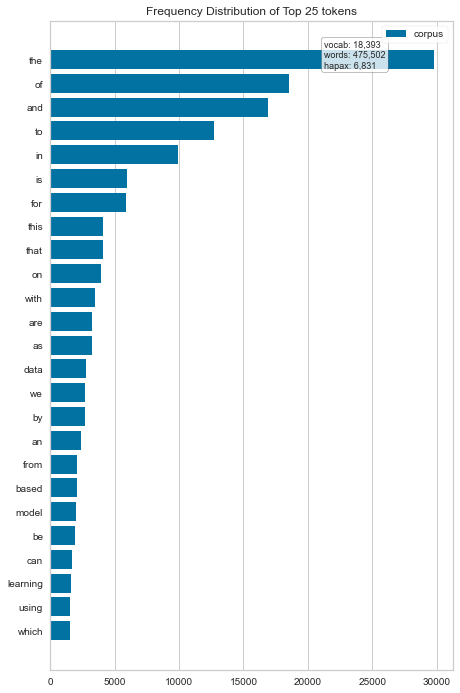

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [21]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25, size= (520, 860))
visualizer.fit(docs)
visualizer.show()

A function that takes as inputs a visualizer object and the number of words to be plotted and returns the **Zipf's law plot**

### Take out english stopwords and check which are the most used words

C:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al', 'et', 'forward', 'mentioned', 'straight', 'versa', 'vice'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


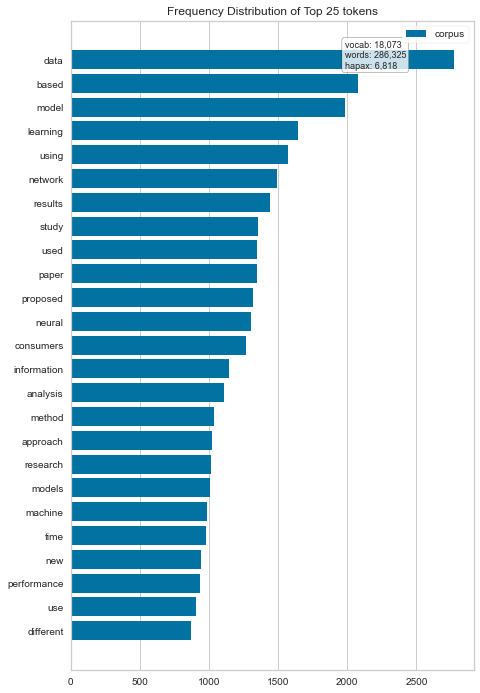

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [46]:
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

In [12]:
#list of english stopwords 
#from sklearn.feature_extraction import stop_words
#print(stop_words.ENGLISH_STOP_WORDS)

In [13]:
'detail' in corpus_all

True

* Check the most popular words only for some years

In [85]:
#Try to use column than index if possible

from datetime import datetime, timedelta
df['coverDate'] = df['coverDate'].astype('datetime64')

In [86]:
df = df.set_index('coverDate')

In [87]:
df["coverDate"] = df.index #terrible to add this columns equal to the index, but the LDA part uses it several times


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

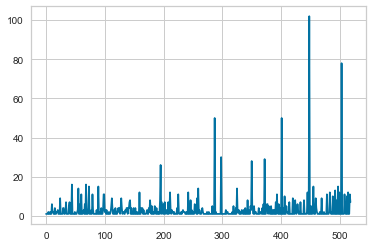

In [18]:
#number of articles published per date (dates with 0 articles are not ont he chart)
plt.plot(df.description.groupby(df.index.date).count().tolist())
plt.show()

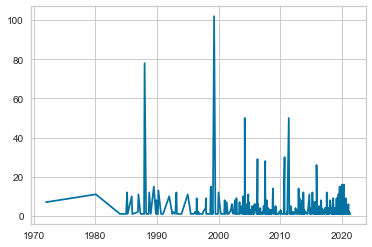

In [19]:
plt.plot(df.index.unique(),df.description.groupby(df.index.date).count().tolist())
plt.show()

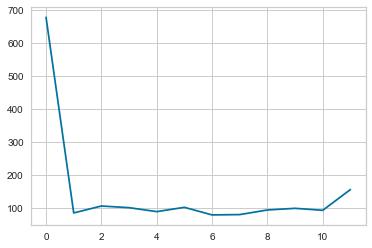

In [20]:
#number of articles published per month (months with 0 articles are not ont he chart)
#the aggregation is done per month. we can see that a lot is published in january, 
#a bit in December, but less at the end of summer
plt.plot(df.description.groupby(df.index.month).count().tolist())
plt.show()

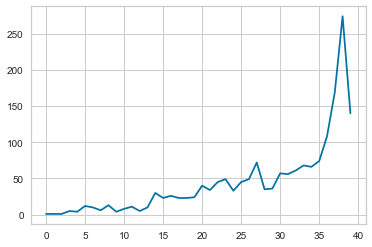

In [21]:
#number of articles published per year, for the years that 
plt.plot( df.description.groupby(df.index.year).count().tolist())
plt.show()

In [22]:
df.description.groupby(df.index.year).count()

coverDate
1972      1
1980      1
1984      1
1985      5
1986      4
1987     12
1988     10
1989      6
1990     13
1991      4
1992      8
1993     11
1994      5
1995     10
1996     30
1997     23
1998     26
1999     23
2000     23
2001     24
2002     40
2003     34
2004     45
2005     49
2006     33
2007     45
2008     49
2009     72
2010     35
2011     36
2012     57
2013     56
2014     61
2015     68
2016     66
2017     74
2018    108
2019    169
2020    274
2021    140
Name: description, dtype: int64

count    2450.000000
mean       19.737959
std        45.611564
min         0.000000
25%         2.000000
50%         7.000000
75%        19.750000
max       966.000000
Name: citedby_count, dtype: float64


(array([1.192e+03, 3.670e+02, 2.780e+02, 1.220e+02, 1.170e+02, 7.000e+01,
        5.400e+01, 3.800e+01, 2.200e+01, 2.800e+01, 2.200e+01, 1.600e+01,
        1.400e+01, 1.800e+01, 1.200e+01, 1.200e+01, 4.000e+00, 6.000e+00,
        4.000e+00, 5.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 4.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

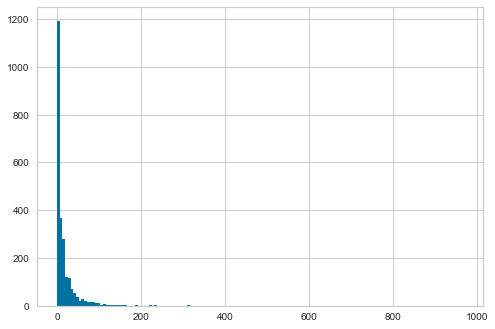

In [19]:
#plot citations
print(df['citedby_count'].describe())
plt.hist(df['citedby_count'], bins = 150)

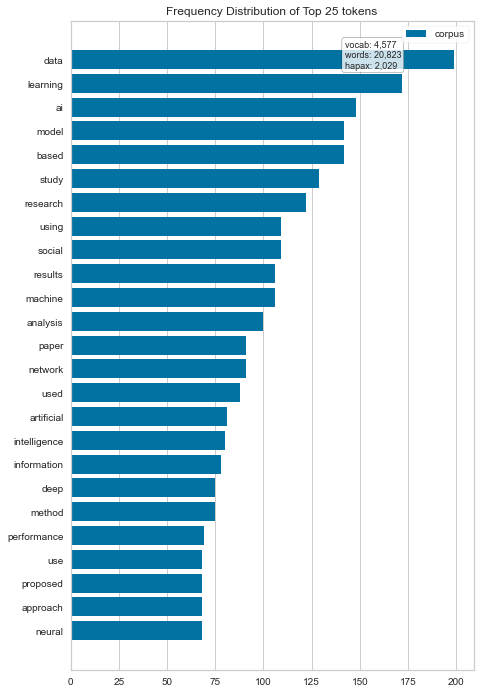

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [24]:
# analysis on 'year 2021'

vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[0:171])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

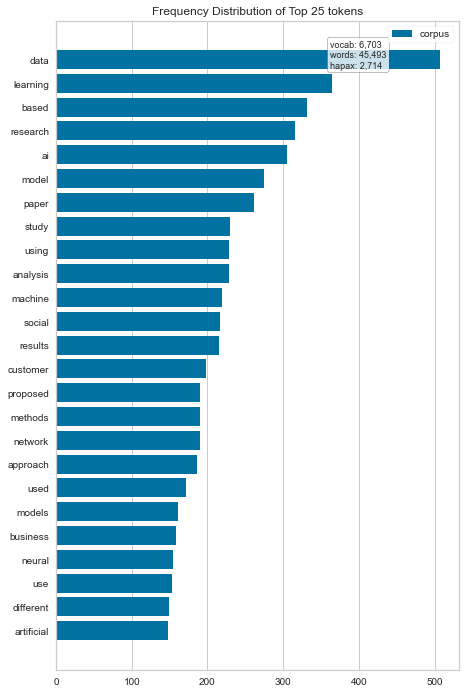

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [25]:
#year 2020
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[171:546])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

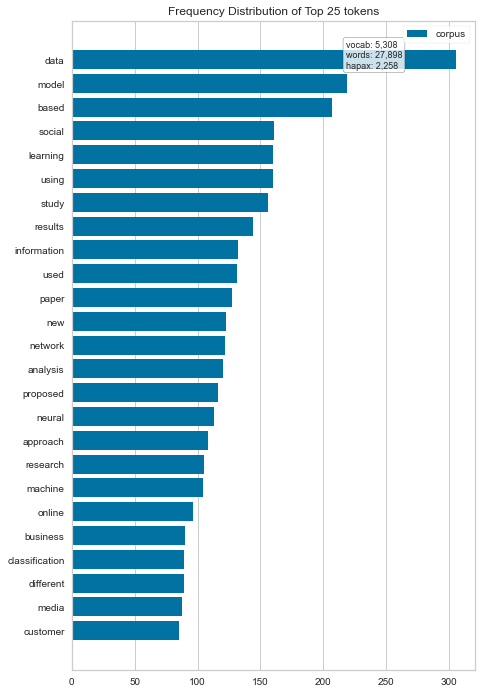

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [26]:
#year 2019
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[546:775])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

----

### Pre-processing:  Lemmatizing & Tokenization

### Creating corpus1 and corpus2

In [47]:
#Select the words that are not numeric and longer than 1 character
#New variable: corpus2

from nltk.tokenize import RegexpTokenizer
import gensim
from gensim.utils import simple_preprocess

#def remove_stopwords(texts):
#    return [[word for word in simple_preprocess(str(doc)) 
#            if word not in my_stop_words] for doc in texts]

corpus_tkn = corpus.copy()

tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(corpus)):
    corpus_tkn[idx] = tokenizer.tokenize(str(corpus[idx]))

corpus2 = [[token for token in doc if not token.isnumeric()] for doc in corpus_tkn]
corpus2 = [[token for token in doc if len(token) > 1] for doc in corpus_tkn]

In [48]:
# Includes bigrams and trigrams to corpus2
# Create corpus1 that is the same of corpus2 but WITHOUT bitrigrams
corpus1 = corpus2.copy()

bigram = gensim.models.Phrases(corpus2, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[corpus2], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=my_stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'], bi = True, tri = True):
    """
    Remove Stopwords, Lemmatization and Form Bigrams and Trigrams [if bi = True, tri = True (by default)]
    If bi and tri are set to false, Bigrams and Trigrams are not added to texts
    
    """
    texts = [[word for word in simple_preprocess(str(doc)) if word not in my_stop_words] for doc in texts]
    if bi:
        texts = [bigram_mod[doc] for doc in texts]
    if tri:
        texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

corpus2 = process_words(corpus2)  # processed Text Data!
corpus1 = process_words(corpus1 , bi = False, tri = False)

In [49]:
print(corpus2[1]) # Checking if it correctly added the bigrams
print("\n")
print(corpus1[1]) # Checking that bigrams are not there 

['elicitation', 'monitoring', 'need', 'important', 'task', 'business', 'allow', 'design', 'centric', 'product', 'service', 'control', 'activity', 'different', 'approach', 'available', 'lack', 'automation', 'scalability', 'monitoring', 'capability', 'work', 'demonstrate', 'feasibility', 'automate', 'prioritization', 'quantification', 'need', 'social_media', 'datum', 'apply', 'supervise', 'machine', 'learning', 'approach', 'example', 'previously', 'label', 'twitter', 'datum', 'domain', 'mobility', 'descriptively', 'code', 'german', 'tweet', 'build', 'distinct', 'classification', 'model', 'result', 'artifact', 'independently', 'determine', 'probability', 'tweet', 'contain', 'previously', 'define', 'need', 'increase', 'scope', 'application', 'deploy', 'machine', 'learning', 'model', 'web', 'service', 'public', 'use', 'result', 'artifact', 'provide', 'valuable', 'insight', 'need', 'elicitation', 'monitoring', 'analyze', 'user', 'generate', 'content', 'large_scale']


['elicitation', 'monito

In [ ]:
#counting bigrams and trigrams

## Count corpus sentences
Note: if we need the sentences as well, we should extract them 

In [35]:
re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0])

['one of the applications of robotic farmer-assistant platforms equipped with machine vision systems is the evaluation of production yield before harvest without damaging the produ',
 'in this situation, farmers receive proper information for harvesting and post-harvesting management to decide about the required human resources, harvesting equipment, storage space, transportation, and product marketi',
 'in this study, a machine vision system on a tracked vehicle was designed and developed for yield estimation of kiwifruit by traveling along the kiwifruit trell',
 'several features, i.e., intensity histogram, the histogram of oriented gradients, shape context, and local binary pattern, were extracted from the images captured from the plants, and the number of kiwifruits in the images was predicted using the support vector machine (svm). to improve the performance of the svm, its parameters were optimized using evolutionary optimization methods, namely, particle swarm optimization (pso)

In [36]:
len(re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0]))

8

In [37]:
corpus_sentences = []

for i in range(0,len(corpus)):
    #split the current abstract into sentences
    sentences = re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[i])
    #nr of sentences in current abstract
    nr_of_sentences = len(sentences)
    corpus_sentences.append(nr_of_sentences)

In [38]:
df.loc[:,'nr_sentences_abstract'] = corpus_sentences

In [39]:
df.nr_sentences_abstract.describe()

count    1751.000000
mean        7.834951
std         3.291487
min         1.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        40.000000
Name: nr_sentences_abstract, dtype: float64

In [40]:
#print(df.nr_sentences_abstract.sum(), "total number of sentences")
#print(df.nr_sentences_abstract.median(), "median")
#print(df.nr_sentences_abstract.describe())
#print(df.loc[df['nr_sentences_abstract'] == 46]['description'].values)

In [41]:
df.loc[df['nr_sentences_abstract'] == 40]['description'].values # Before it was 46, then 41, now it seems to be 40... what did we remove?

array(['chapter 1: how australia improved health equity through action on the social determinants of health: do not think that the social determinants of health equity are old hat. in reality, australia is very far away from addressing the societal level drivers of health inequity. there is little progressive policy that touches on the conditions of daily life that matter for health, and action to redress inequities in power, money and resources is almost non-existent. in this chapter we ask you to pause this reality and come on a fantastic journey where we envisage how covid-19 was a great disruptor and accelerator of positive progressive action. we offer glimmers of what life could be like if there was committed and real policy action on the social determinants of health equity. it is vital that the health sector assists in convening the multisectoral stakeholders necessary to turn this fantasy into reality. chapter 2: aboriginal and torres strait islander connection to culture: buil

In [42]:
#df.loc[df['nr_sentences_abstract'] == 41]['description']
#re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', df.loc[1922]["description"])

### Keywords

In [43]:
keywords = df["authkeywords"].tolist()
print(keywords[1])

Bangladesh | COVID-19 | Entrepreneurial marketing decisions | Opportunity development | Opportunity exploitation | Opportunity recognition | Technology


In [44]:
keywords_paper = [] # List of the keywords associated to each paper (another list)
keywords_all = [] # List of all the keywords (the same keyword can be repeated more than once)

for i in range(0, len(keywords)):
    # Some articles do not have keywords, set it to nan
    if keywords[i] == None:
        res = pd.NA
    else:
        # The keywords are separated by " | ", using it to split them
        res = keywords[i].split(" | ")
        keywords_all.extend(res) # Must be inside the else block, otherwise get error: 'NAType' object is not iterable
    keywords_paper.append(res)

# Checking if okay
print(keywords_all[5000])
print(keywords_paper[50])

text classification
['classification', 'clustering', 'deep learning', 'lexical features', 'online advertisement']


# (Very) Basic sentiment analysis

### TO DO:
- Eliminate "ieee" in pre-processing as they might influence sentiment analysis - done


In [45]:
# Sentiment analysis using textblob
from textblob import TextBlob

subjectivity_list = []
polarity_list =[]
corpus1_as_sentence = []

for abstr in corpus1:
    corpus1_as_sentence.append(" ".join(abstr))

for abstr in corpus1_as_sentence:
    # TextBlob().sentiment returns the sentiment associated with a sentence (or sentences in this case)
    subjectivity_list.append(TextBlob(abstr).sentiment[1]) # [1] because we take only the subjetivity measure
    polarity_list.append(TextBlob(abstr).sentiment[0])# with .sentiment[0] we get an index in the range [-1,+1] that reports the positity/negativity of the sentence

# merge it with the dataframe
df["corpus1"] = corpus1_as_sentence
df["abs_subjectivity"] = subjectivity_list
df["abs_polarity"] = polarity_list
print(max(df["abs_subjectivity"]))
print(min(df["abs_subjectivity"]))

# check if correlated with number of citations
print(np.corrcoef(df["abs_subjectivity"], df.citedby_count))
print(np.corrcoef(df["abs_polarity"], df.citedby_count))

# check one of the most subjective sentences (does not sound that subjective)
print("\nMost subjective sentence according to TextBlog (from raw data):")
print(df[df["abs_subjectivity"] == max(df["abs_subjectivity"])].description.values[1])
print("\nMost subjective sentence according to TextBlog (after data cleaning):")
print(df[df["abs_subjectivity"] == max(df["abs_subjectivity"])].corpus1.values[1])
#print(list((df["abs_subjectivity"] == max(df["abs_subjectivity"]))))

# Check the most negative sentence
print("\nMost negative sentence according to TextBlog:")
print(df[df["abs_polarity"] == min(df["abs_polarity"])].description.values[0])

1.0
0.0
[[ 1.         -0.01945625]
 [-0.01945625  1.        ]]
[[1.         0.06110161]
 [0.06110161 1.        ]]

Most subjective sentence according to TextBlog (from raw data):
the estimated probability that spinning reserve is called and generated is considered crucial in the formulation of generation scheduling to simulate the spinning reserve uncertainty. in this paper, artificial neural network (ann) is applied for forecasting the spinning reserve probability considering line limits, line and generator outages, market prices, bidding strategy, and load and spinning reserve patterns. © 2005 ieee.

Most subjective sentence according to TextBlog (after data cleaning):
estimate probability spin reserve generate consider crucial formulation generation scheduling simulate spin reserve uncertainty paper artificial neural network ann apply forecasting spinning reserve probability consider line limit line generator outage market price bid strategy load spin reserve pattern ieee

Most nega

In [46]:
# Sentiment analysis using pysentiment2
import pysentiment2 as ps
lm = ps.LM()
list_scores = []
for i in range(0,len(corpus)):
    tokens = lm.tokenize(corpus[i])
    score = lm.get_score(tokens)
    list_scores.append(score)

In [47]:
# create dataframe od pysentiment2 scores with same index of df
df_sentiment = pd.DataFrame.from_dict(list_scores) 
df_sentiment.set_index(df.index, drop = True, inplace = True)

In [48]:
# printing most subjective sentence according to pysentiment2
print(df[df_sentiment.Subjectivity == max(df_sentiment.Subjectivity)].description.values[0])

# check if Subjectivity correlated with number of citations
print("\nCORRELATION:\n", np.corrcoef(df_sentiment.Subjectivity, df.citedby_count))

# check if Polarity correlated with number of citations
print(np.corrcoef(df_sentiment.Polarity, df.citedby_count))

electronic products may be subjected to shock and vibration during shipping, normal usage, and accidental drop. high strain rate transient bending produced by such loads may result in failure of fine pitch electronic interconnects. current experimental techniques rely on electrical resistance for determination of failure. significant advantage can be gained by prior knowledge of impending failure for applications where the consequences of system failure may be catastrophic. this research effort focuses on an alternate approach to damage quantification in electronic assemblies subjected to shock and vibration, without testing for electrical continuity. the proposed approach can be extended to monitor product level damage. in this paper, statistical pattern recognition and leading indicators of shock damage have been used to study the damage initiation and progression in shock and drop of electronic assemblies. statistical pattern recognition is currently being employed in a variety of e

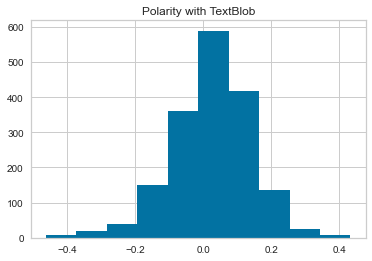

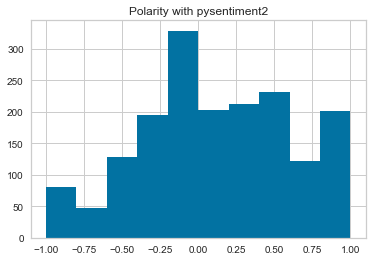

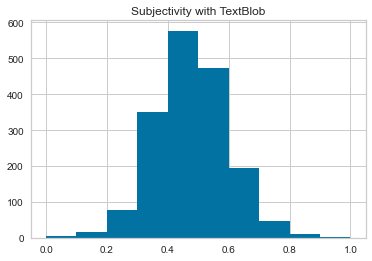

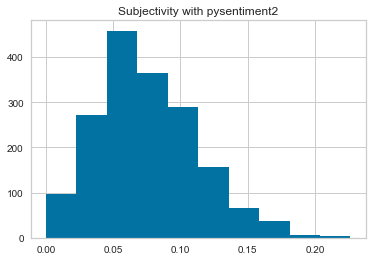

In [49]:
# HISTOGRAMS with the distribution of scores with the 2 packages
plt.hist(df["abs_polarity"])
plt.title("Polarity with TextBlob")
plt.show()
plt.hist(df_sentiment["Polarity"])
plt.title("Polarity with pysentiment2")
plt.show()
plt.hist(df["abs_subjectivity"])
plt.title("Subjectivity with TextBlob")
plt.show()
plt.hist(df_sentiment["Subjectivity"])
plt.title("Subjectivity with pysentiment2")
plt.show()

----

## Word cloud


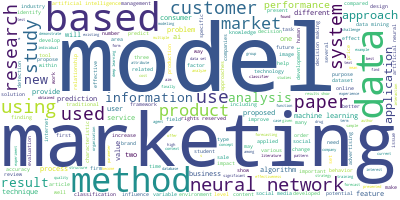

In [50]:
from wordcloud import WordCloud


long_string = ','.join(list(df['description'].values))
#print(long_string[1:100])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

# LDA - unigram

In [51]:
#out1 = df['description'].values #unigram

def sent_to_words(sentences):
    for sentence in sentences:
        #deacc = True -> removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

data_words = list(sent_to_words(corpus))

#print(data_words[:1][0][:30])


In [52]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]


#print(corpus[:1][0][:30])

In [53]:
from pprint import pprint

num_topics = 15

lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50, decay = 0.6)

lda_model.save('lda_model.model')

doc_lda = lda_model[corpus]


In [54]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           workers = 7,
                                           random_state=100,
                                           chunksize=200,
                                           passes=2,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [55]:
print(lda_model.print_topics(20, num_words = 20))

[(0, '0.052*"of" + 0.052*"the" + 0.025*"and" + 0.023*"in" + 0.019*"to" + 0.015*"for" + 0.010*"that" + 0.009*"are" + 0.008*"as" + 0.007*"is" + 0.007*"this" + 0.007*"on" + 0.006*"with" + 0.006*"we" + 0.005*"data" + 0.005*"information" + 0.005*"drug" + 0.005*"by" + 0.004*"from" + 0.004*"more"'), (1, '0.040*"and" + 0.036*"of" + 0.022*"the" + 0.016*"to" + 0.014*"in" + 0.010*"for" + 0.010*"research" + 0.010*"this" + 0.010*"marketing" + 0.009*"reviews" + 0.008*"analysis" + 0.008*"on" + 0.008*"customer" + 0.008*"are" + 0.007*"business" + 0.007*"that" + 0.006*"can" + 0.006*"methods" + 0.005*"were" + 0.005*"online"'), (2, '0.058*"the" + 0.035*"of" + 0.029*"and" + 0.028*"to" + 0.020*"in" + 0.013*"is" + 0.012*"we" + 0.012*"on" + 0.011*"for" + 0.009*"that" + 0.009*"this" + 0.007*"with" + 0.007*"based" + 0.007*"data" + 0.007*"learning" + 0.007*"are" + 0.006*"social" + 0.006*"as" + 0.006*"by" + 0.006*"from"'), (3, '0.046*"the" + 0.037*"and" + 0.029*"of" + 0.025*"in" + 0.018*"to" + 0.015*"learning" + 

In [56]:
#Converting LDA model output (topic distribution per document) to regression varaibles
#print(lda_model.print_topics(20, num_words = 15)[:10])

train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    train_vecs.append(topic_vec)
    
print(len(train_vecs))

1751


y should be weighted because earlier publications usually dont have 
fair chance to be cited. Thus, we weight the y variable. 
Or, we should delete the publications published after 2020-6-1

For now, no logical methods is proposed. Thus, we restrict our sample size.

In [57]:
#logistic regression - unigram
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
import numpy as np

#X = np.column_stack([train_vecs, df.index.year, df.h_index])
X = np.column_stack([df.index.year, df.h_index])
y = np.array(df.citedby_count)
y[y<=np.median(y)] = 0
y[y>np.median(y)] = 1
#One as it is
#One just with train index
#

kf = KFold(10, shuffle = True, random_state = 42)

cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

Logistic Regression Val f1: 0.683 +- 0.045
Logisitic Regression SGD Val f1: 0.698 +- 0.043
SVM Huber Val f1: 0.400 +- 0.327


In [58]:
print(lr.coef_, lr.intercept_)

[[-0.43836945  1.223113  ]] [0.14433826]


#We create a handful of LDA models with different topic values, 
#then see how these perform in the supervised classification model training
#This is specific to our goal

 We can also run HDP, which seeks to learn the correct number of topics
 from the data, that is, you don't need to provide a fixed number of topics.
 In the end, we expect to run a basic logistic regression - to be done later

When topic = 20

Logistic Regression Val f1: 0.564 +- 0.045
Logisitic Regression SGD Val f1: 0.504 +- 0.067
SVM Huber Val f1: 0.462 +- 0.304
    
When topic = 15
Logistic Regression Val f1: 0.545 +- 0.047
Logisitic Regression SGD Val f1: 0.563 +- 0.049
SVM Huber Val f1: 0.402 +- 0.329
    
When topic = 10

Logistic Regression Val f1: 0.563 +- 0.047
Logisitic Regression SGD Val f1: 0.561 +- 0.090
SVM Huber Val f1: 0.401 +- 0.328
    
When topic = 5

Logistic Regression Val f1: 0.530 +- 0.037
Logisitic Regression SGD Val f1: 0.532 +- 0.066
SVM Huber Val f1: 0.393 +- 0.321

## LDA - bigram + trigram + logistic regression


In [52]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
dictionary2 = Dictionary(corpus2)
dictionary2.filter_extremes(no_below=20, no_above=0.5)
bi_corpus = [dictionary2.doc2bow(doc) for doc in corpus2]

topic = []
perplexity= []
decay = []

num_topics = 20
temp = dictionary2[0]  # This is only to "load" the dictionary.

In [65]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=bi_corpus,
                                           id2word=dictionary2,
                                           num_topics=k, 
                                           workers = 11,
                                           random_state=100,
                                           chunksize=200,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus2, dictionary=dictionary2, coherence='u_mass')
    
    return coherence_model_lda.get_coherence()

In [70]:
from gensim.models import CoherenceModel
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 5
max_topics = 20
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
beta.append('auto')

# Validation sets
num_of_docs = len(bi_corpus)
corpus_sets = [gensim.utils.ClippedCorpus(bi_corpus, int(num_of_docs*0.75)), 
               bi_corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha va
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary2, 
                                                  k=k, a=a, b=b)
                    print(cv)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('./results/lda_tuning_results.csv', index=False)
    pbar.close()


  0%|                                                                               | 1/1080 [00:08<2:41:20,  8.97s/it]

-1.5716369603841642



  0%|▏                                                                              | 2/1080 [00:17<2:39:41,  8.89s/it]

-1.6651166687893415



  0%|▏                                                                              | 3/1080 [00:26<2:37:08,  8.75s/it]

-1.5754013377832792



  0%|▎                                                                              | 4/1080 [00:34<2:34:58,  8.64s/it]

-1.5499793223185785



  0%|▎                                                                              | 5/1080 [00:42<2:33:50,  8.59s/it]

-1.5530132446043337



  1%|▍                                                                              | 6/1080 [00:51<2:32:45,  8.53s/it]

-1.602368509312623



  1%|▌                                                                              | 7/1080 [00:59<2:32:18,  8.52s/it]

-1.6093815196949788



  1%|▌                                                                              | 8/1080 [01:08<2:32:24,  8.53s/it]

-1.7212023605764712



  1%|▋                                                                              | 9/1080 [01:16<2:32:10,  8.53s/it]

-1.4868028060428369



  1%|▋                                                                             | 10/1080 [01:25<2:33:35,  8.61s/it]

-1.5480719770820301



  1%|▊                                                                             | 11/1080 [01:34<2:33:06,  8.59s/it]

-1.6535435876887856



  1%|▊                                                                             | 12/1080 [01:42<2:33:25,  8.62s/it]

-1.6387491523942272



  1%|▉                                                                             | 13/1080 [01:51<2:35:28,  8.74s/it]

-1.634094738252997


  3%|██▋                                                                           | 37/1080 [11:08<5:14:13, 18.08s/it]

  1%|█                                                                             | 14/1080 [02:00<2:35:48,  8.77s/it]

-1.712817250857702



  1%|█                                                                             | 15/1080 [02:09<2:34:50,  8.72s/it]

-1.7176100723060457



  1%|█▏                                                                            | 16/1080 [02:18<2:34:15,  8.70s/it]

-1.6766806599861503



  2%|█▏                                                                            | 17/1080 [02:26<2:33:27,  8.66s/it]

-1.66526136616154



  2%|█▎                                                                            | 18/1080 [02:35<2:32:42,  8.63s/it]

-1.66526136616154



  2%|█▎                                                                            | 19/1080 [02:43<2:32:03,  8.60s/it]

-1.5515982363356293



  2%|█▍                                                                            | 20/1080 [02:52<2:31:45,  8.59s/it]

-1.7204580960656117



  2%|█▌                                                                            | 21/1080 [03:00<2:31:06,  8.56s/it]

-1.7342593490709075



  2%|█▌                                                                            | 22/1080 [03:09<2:31:40,  8.60s/it]

-1.5439291223788212



  2%|█▋                                                                            | 23/1080 [03:18<2:31:32,  8.60s/it]

-1.582869968717064



  2%|█▋                                                                            | 24/1080 [03:26<2:30:34,  8.56s/it]

-1.6597689454420348



  2%|█▊                                                                            | 25/1080 [03:34<2:29:47,  8.52s/it]

-1.5717236873576255



  2%|█▉                                                                            | 26/1080 [03:43<2:29:06,  8.49s/it]

-1.6332449168111416



  2%|█▉                                                                            | 27/1080 [03:52<2:30:40,  8.59s/it]

-1.584648717332915



  3%|██                                                                            | 28/1080 [04:00<2:30:52,  8.60s/it]

-1.5947428191257051



  3%|██                                                                            | 29/1080 [04:09<2:30:05,  8.57s/it]

-1.6991177117764547



  3%|██▏                                                                           | 30/1080 [04:17<2:29:33,  8.55s/it]

-1.546008618564981



  3%|██▏                                                                           | 31/1080 [04:26<2:28:53,  8.52s/it]

-1.7100597822436079



  3%|██▎                                                                           | 32/1080 [04:34<2:27:58,  8.47s/it]

-1.7586264414104278



  3%|██▍                                                                           | 33/1080 [04:43<2:27:27,  8.45s/it]

-1.7769411836343791



  3%|██▍                                                                           | 34/1080 [04:51<2:27:06,  8.44s/it]

-1.5951722829369663



  3%|██▌                                                                           | 35/1080 [04:59<2:27:21,  8.46s/it]

-1.6008567368207216



  3%|██▌                                                                           | 36/1080 [05:08<2:27:00,  8.45s/it]

-1.700254490975994



  3%|██▋                                                                           | 37/1080 [05:16<2:26:32,  8.43s/it]

-1.5866974135017315



  4%|██▋                                                                           | 38/1080 [05:25<2:26:57,  8.46s/it]

-1.6384751173657577



  4%|██▊                                                                           | 39/1080 [05:33<2:27:23,  8.49s/it]

-1.651275577905522



  4%|██▉                                                                           | 40/1080 [05:42<2:26:53,  8.47s/it]

-1.6417500924369126



  4%|██▉                                                                           | 41/1080 [05:50<2:27:40,  8.53s/it]

-1.5523247876405513



  4%|███                                                                           | 42/1080 [05:59<2:28:25,  8.58s/it]

-1.609691372742912



  4%|███                                                                           | 43/1080 [06:08<2:27:55,  8.56s/it]

-1.7873514505132073



  4%|███▏                                                                          | 44/1080 [06:16<2:27:24,  8.54s/it]

-1.7063932579103478



  4%|███▎                                                                          | 45/1080 [06:25<2:27:30,  8.55s/it]

-1.7372072381846113



  4%|███▎                                                                          | 46/1080 [06:33<2:27:30,  8.56s/it]

-1.7618931486537355



  4%|███▍                                                                          | 47/1080 [06:42<2:27:18,  8.56s/it]

-1.5670348952841457



  4%|███▍                                                                          | 48/1080 [06:50<2:27:07,  8.55s/it]

-1.771676253092173



  5%|███▌                                                                          | 49/1080 [06:59<2:27:18,  8.57s/it]

-1.7538758968290986



  5%|███▌                                                                          | 50/1080 [07:08<2:27:35,  8.60s/it]

-1.7917040378697626



  5%|███▋                                                                          | 51/1080 [07:16<2:27:14,  8.59s/it]

-1.7464316697701612



  5%|███▊                                                                          | 52/1080 [07:25<2:27:13,  8.59s/it]

-1.8228371796716398



  5%|███▊                                                                          | 53/1080 [07:33<2:26:52,  8.58s/it]

-1.6943888539544423



  5%|███▉                                                                          | 54/1080 [07:42<2:26:55,  8.59s/it]

-1.738256475944403



  5%|███▉                                                                          | 55/1080 [07:51<2:27:20,  8.62s/it]

-1.8424126411142112



  5%|████                                                                          | 56/1080 [07:59<2:27:48,  8.66s/it]

-1.8721924115266486



  5%|████                                                                          | 57/1080 [08:08<2:27:30,  8.65s/it]

-1.7785308202165868



  5%|████▏                                                                         | 58/1080 [08:17<2:26:55,  8.63s/it]

-1.7203452210147245



  5%|████▎                                                                         | 59/1080 [08:25<2:25:53,  8.57s/it]

-1.7904082292356671



  6%|████▎                                                                         | 60/1080 [08:34<2:25:12,  8.54s/it]

-1.906877448616215



  6%|████▍                                                                         | 61/1080 [08:42<2:24:37,  8.52s/it]

-1.7326921219730023



  6%|████▍                                                                         | 62/1080 [08:51<2:24:32,  8.52s/it]

-1.7399159832652813



  6%|████▌                                                                         | 63/1080 [09:00<2:27:03,  8.68s/it]

-1.8270478289902308



  6%|████▌                                                                         | 64/1080 [09:08<2:26:04,  8.63s/it]

-1.6290166476920998



  6%|████▋                                                                         | 65/1080 [09:17<2:25:09,  8.58s/it]

-1.6674737751809134



  6%|████▊                                                                         | 66/1080 [09:25<2:24:24,  8.54s/it]

-1.8387011630201064



  6%|████▊                                                                         | 67/1080 [09:33<2:23:34,  8.50s/it]

-1.7048970246506048



  6%|████▉                                                                         | 68/1080 [09:42<2:23:04,  8.48s/it]

-1.658519245892647



  6%|████▉                                                                         | 69/1080 [09:51<2:23:54,  8.54s/it]

-1.7814977843522088



  6%|█████                                                                         | 70/1080 [09:59<2:24:21,  8.58s/it]

-1.65856507086076



  7%|█████▏                                                                        | 71/1080 [10:08<2:23:36,  8.54s/it]

-1.7945972998794604



  7%|█████▏                                                                        | 72/1080 [10:16<2:23:21,  8.53s/it]

-1.7902961041330618



  7%|█████▎                                                                        | 73/1080 [10:25<2:22:57,  8.52s/it]

-1.7483517604966348



  7%|█████▎                                                                        | 74/1080 [10:33<2:22:45,  8.51s/it]

-1.7082889986497423



  7%|█████▍                                                                        | 75/1080 [10:42<2:22:20,  8.50s/it]

-1.6328204523302634



  7%|█████▍                                                                        | 76/1080 [10:50<2:23:37,  8.58s/it]

-1.8075246629169628



  7%|█████▌                                                                        | 77/1080 [10:59<2:24:08,  8.62s/it]

-1.6865690368776516



  7%|█████▋                                                                        | 78/1080 [11:08<2:23:49,  8.61s/it]

-1.7506779551585054



  7%|█████▍                                                                     | 79/1080 [31:01<101:11:03, 363.90s/it]

-1.7303239098439234



  7%|█████▋                                                                      | 80/1080 [31:12<71:41:55, 258.12s/it]

-1.768605292023145



  8%|█████▋                                                                      | 81/1080 [31:21<50:54:00, 183.42s/it]

-1.8301713552911247



  8%|█████▊                                                                      | 82/1080 [31:30<36:18:54, 131.00s/it]

-1.7766922323674645



  8%|█████▉                                                                       | 83/1080 [31:38<26:06:31, 94.27s/it]

-1.719837076863732



  8%|█████▉                                                                       | 84/1080 [31:47<18:58:31, 68.59s/it]

-1.8045380962660018



  8%|██████                                                                       | 85/1080 [31:56<14:00:16, 50.67s/it]

-1.8423839968970273



  8%|██████▏                                                                      | 86/1080 [32:05<10:30:43, 38.07s/it]

-1.820509993919757



  8%|██████▎                                                                       | 87/1080 [32:13<8:04:02, 29.25s/it]

-1.815812294194582



  8%|██████▎                                                                       | 88/1080 [32:22<6:21:40, 23.09s/it]

-1.7600370740362135



  8%|██████▍                                                                       | 89/1080 [32:31<5:10:15, 18.78s/it]

-1.8744335481684806



  8%|██████▌                                                                       | 90/1080 [32:39<4:19:45, 15.74s/it]

-1.8744231772495838



  8%|██████▌                                                                       | 91/1080 [32:48<3:43:14, 13.54s/it]

-1.833407431684303



  9%|██████▋                                                                       | 92/1080 [32:56<3:18:11, 12.04s/it]

-1.907224173946749



  9%|██████▋                                                                       | 93/1080 [33:05<3:01:26, 11.03s/it]

-1.7461175136569775



  9%|██████▊                                                                       | 94/1080 [33:14<2:53:55, 10.58s/it]

-1.6830419041504256



  9%|██████▊                                                                       | 95/1080 [33:24<2:46:46, 10.16s/it]

-1.8605529231142444



  9%|██████▉                                                                       | 96/1080 [33:33<2:42:53,  9.93s/it]

-1.7275674679113517



  9%|███████                                                                       | 97/1080 [33:42<2:38:34,  9.68s/it]

-1.7400139349948314



  9%|███████                                                                       | 98/1080 [33:52<2:37:21,  9.61s/it]

-1.6190963745851765



  9%|███████▏                                                                      | 99/1080 [34:01<2:38:30,  9.69s/it]

-1.6073688336285008



  9%|███████▏                                                                     | 100/1080 [34:11<2:35:43,  9.53s/it]

-1.653409783734509



  9%|███████▏                                                                     | 101/1080 [34:20<2:33:09,  9.39s/it]

-1.7410300809171204



  9%|███████▎                                                                     | 102/1080 [34:29<2:32:17,  9.34s/it]

-1.7169751983598736



 10%|███████▎                                                                     | 103/1080 [34:38<2:31:22,  9.30s/it]

-1.7225812791914261



 10%|███████▍                                                                     | 104/1080 [34:48<2:32:11,  9.36s/it]

-1.739299984837079



 10%|███████▍                                                                     | 105/1080 [34:56<2:29:54,  9.22s/it]

-1.8416031589065578



 10%|███████▌                                                                     | 106/1080 [35:06<2:29:00,  9.18s/it]

-1.8215515457749303



 10%|███████▋                                                                     | 107/1080 [35:15<2:29:49,  9.24s/it]

-1.6604447722368498



 10%|███████▋                                                                     | 108/1080 [35:24<2:30:54,  9.32s/it]

-1.7778453778641847



 10%|███████▊                                                                     | 109/1080 [35:34<2:30:01,  9.27s/it]

-1.7774606359961282



 10%|███████▊                                                                     | 110/1080 [35:43<2:30:19,  9.30s/it]

-1.7705938672823378



 10%|███████▉                                                                     | 111/1080 [35:53<2:32:23,  9.44s/it]

-1.709912974809591



 10%|███████▉                                                                     | 112/1080 [36:02<2:32:46,  9.47s/it]

-1.6955140040633485



 10%|████████                                                                     | 113/1080 [36:12<2:35:50,  9.67s/it]

-1.745834459588858



 11%|████████▏                                                                    | 114/1080 [36:22<2:33:36,  9.54s/it]

-1.8089188937288938



 11%|████████▏                                                                    | 115/1080 [36:30<2:29:07,  9.27s/it]

-1.7859522502447682



 11%|████████▎                                                                    | 116/1080 [36:39<2:25:35,  9.06s/it]

-1.841144349614328



 11%|████████▎                                                                    | 117/1080 [36:47<2:23:19,  8.93s/it]

-1.8081367901008676



 11%|████████▍                                                                    | 118/1080 [36:56<2:21:34,  8.83s/it]

-1.877558468374001



 11%|████████▍                                                                    | 119/1080 [37:05<2:20:05,  8.75s/it]

-1.8209357242368585



 11%|████████▌                                                                    | 120/1080 [37:13<2:19:16,  8.71s/it]

-1.9049243038969548



 11%|████████▋                                                                    | 121/1080 [37:22<2:18:42,  8.68s/it]

-1.900168024283594



 11%|████████▋                                                                    | 122/1080 [37:30<2:18:12,  8.66s/it]

-1.9419850655020396



 11%|████████▊                                                                    | 123/1080 [37:39<2:17:35,  8.63s/it]

-1.904899328229259



 11%|████████▊                                                                    | 124/1080 [37:48<2:17:32,  8.63s/it]

-1.917177540716579



 12%|████████▉                                                                    | 125/1080 [37:57<2:18:49,  8.72s/it]

-1.9008631678177352



 12%|████████▉                                                                    | 126/1080 [38:05<2:19:06,  8.75s/it]

-1.8477324691749097



 12%|█████████                                                                    | 127/1080 [38:14<2:17:19,  8.65s/it]

-1.9231914268328612



 12%|█████████▏                                                                   | 128/1080 [38:22<2:16:15,  8.59s/it]

-1.7386079973715418



 12%|█████████▏                                                                   | 129/1080 [38:31<2:15:32,  8.55s/it]

-1.9198907970543693



 12%|█████████▎                                                                   | 130/1080 [38:39<2:15:10,  8.54s/it]

-1.7740580861457063



 12%|█████████▎                                                                   | 131/1080 [38:48<2:14:22,  8.50s/it]

-1.9220142947107743



 12%|█████████▍                                                                   | 132/1080 [38:57<2:17:13,  8.69s/it]

-1.7689874949183828



 12%|█████████▍                                                                   | 133/1080 [39:05<2:17:19,  8.70s/it]

-1.773573689786065



 12%|█████████▌                                                                   | 134/1080 [39:14<2:15:57,  8.62s/it]

-1.7638841391070912



 12%|█████████▋                                                                   | 135/1080 [39:22<2:14:52,  8.56s/it]

-1.8185231447657944



 13%|█████████▋                                                                   | 136/1080 [39:31<2:14:08,  8.53s/it]

-1.7833009944281035



 13%|█████████▊                                                                   | 137/1080 [39:39<2:13:28,  8.49s/it]

-1.8053647899216534



 13%|█████████▊                                                                   | 138/1080 [39:48<2:13:25,  8.50s/it]

-1.8763192343336907



 13%|█████████▉                                                                   | 139/1080 [39:56<2:14:28,  8.57s/it]

-1.7260340693164786



 13%|█████████▉                                                                   | 140/1080 [40:05<2:14:33,  8.59s/it]

-1.6971595055317414



 13%|██████████                                                                   | 141/1080 [40:14<2:14:17,  8.58s/it]

-1.7340033006579416



 13%|██████████                                                                   | 142/1080 [40:22<2:13:51,  8.56s/it]

-1.7065254661026157



 13%|██████████▏                                                                  | 143/1080 [40:31<2:13:23,  8.54s/it]

-1.804436506887296



 13%|██████████▎                                                                  | 144/1080 [40:39<2:13:03,  8.53s/it]

-1.7714667033536253



 13%|██████████▎                                                                  | 145/1080 [40:48<2:12:53,  8.53s/it]

-1.801392629958597



 14%|██████████▍                                                                  | 146/1080 [40:56<2:13:11,  8.56s/it]

-1.739899139715582



 14%|██████████▍                                                                  | 147/1080 [41:05<2:14:18,  8.64s/it]

-1.8649849206679008



 14%|██████████▌                                                                  | 148/1080 [41:14<2:14:55,  8.69s/it]

-1.8246114547316286



 14%|██████████▌                                                                  | 149/1080 [41:23<2:15:56,  8.76s/it]

-1.7355017892248892



 14%|██████████▋                                                                  | 150/1080 [41:32<2:16:19,  8.80s/it]

-1.8307121338889378



 14%|█████████▊                                                            | 151/1080 [5:07:53<1238:47:22, 4800.48s/it]

-1.7905982476278375



 14%|█████████▉                                                             | 152/1080 [5:08:05<867:11:49, 3364.13s/it]

-1.848469601478546



 14%|██████████                                                             | 153/1080 [5:08:14<607:03:08, 2357.49s/it]

-1.8951652120377982



 14%|██████████                                                             | 154/1080 [5:08:23<425:08:46, 1652.84s/it]

-1.8756125067799028



 14%|██████████▏                                                            | 155/1080 [5:08:32<297:57:47, 1159.64s/it]

-1.8395302518809113



 14%|██████████▍                                                             | 156/1080 [5:08:40<209:01:00, 814.35s/it]

-1.817813879122773



 15%|██████████▍                                                             | 157/1080 [5:08:49<146:49:43, 572.68s/it]

-1.8758938868222437



 15%|██████████▌                                                             | 158/1080 [5:08:59<103:23:42, 403.71s/it]

-1.9127621866388185



 15%|██████████▋                                                              | 159/1080 [5:09:08<73:01:46, 285.46s/it]

-1.8975436157187429



 15%|██████████▊                                                              | 160/1080 [5:09:18<51:49:17, 202.78s/it]

-1.9302896855401441



 15%|██████████▉                                                              | 161/1080 [5:09:27<36:55:06, 144.62s/it]

-1.878460749244073



 15%|██████████▉                                                              | 162/1080 [5:09:36<26:29:10, 103.87s/it]

-1.962888910836738



 15%|███████████▏                                                              | 163/1080 [5:09:44<19:10:25, 75.27s/it]

-1.8212243075587002



 15%|███████████▏                                                              | 164/1080 [5:09:53<14:06:37, 55.46s/it]

-1.7735416359017464



 15%|███████████▎                                                              | 165/1080 [5:10:02<10:32:43, 41.49s/it]

-1.8497844579704266



 15%|███████████▌                                                               | 166/1080 [5:10:11<8:02:49, 31.69s/it]

-1.90469119563703



 15%|██████████▉                                                            | 167/1080 [7:00:57<511:16:32, 2015.98s/it]

-1.7387356288654212



 16%|███████████                                                            | 168/1080 [7:01:08<358:20:49, 1414.53s/it]

-1.7857804171673974



 16%|███████████▎                                                            | 169/1080 [7:01:17<251:14:35, 992.84s/it]

-1.7950676915262502



 16%|███████████▎                                                            | 170/1080 [7:01:26<176:20:20, 697.60s/it]

-1.7494027621184065



 16%|███████████▍                                                            | 171/1080 [7:01:35<123:59:48, 491.08s/it]

-1.7529047959385307



 16%|███████████▋                                                             | 172/1080 [7:01:44<87:22:43, 346.44s/it]

-1.890188442928886



 16%|███████████▋                                                             | 173/1080 [7:01:53<61:47:17, 245.25s/it]

-1.763044026765603



 16%|███████████▊                                                             | 174/1080 [7:02:02<43:54:16, 174.45s/it]

-1.813029893739613



 16%|███████████▊                                                             | 175/1080 [7:02:11<31:22:23, 124.80s/it]

-1.7726104816085428



 16%|████████████                                                              | 176/1080 [7:02:20<22:35:33, 89.97s/it]

-1.7930676202141003



 16%|████████████▏                                                             | 177/1080 [7:02:29<16:26:28, 65.55s/it]

-1.741172073450254



 16%|████████████▏                                                             | 178/1080 [7:02:37<12:08:32, 48.46s/it]

-1.7651220314006595



 17%|████████████▍                                                              | 179/1080 [7:02:46<9:10:08, 36.64s/it]

-1.7467284811315182



 17%|████████████▌                                                              | 180/1080 [7:02:55<7:04:17, 28.29s/it]

-1.7827079915104445



 17%|████████████▌                                                              | 181/1080 [7:03:04<5:36:46, 22.48s/it]

-1.8155698253968322



 17%|████████████▋                                                              | 182/1080 [7:03:13<4:34:38, 18.35s/it]

-1.967883435924819



 17%|████████████▋                                                              | 183/1080 [7:03:21<3:50:21, 15.41s/it]

-1.8254219183539



 17%|████████████▊                                                              | 184/1080 [7:03:30<3:19:33, 13.36s/it]

-2.1013330192531603



 17%|████████████▊                                                              | 185/1080 [7:03:38<2:58:02, 11.94s/it]

-1.8085551999458318



 17%|████████████▉                                                              | 186/1080 [7:03:47<2:43:09, 10.95s/it]

-1.8702698652272893



 17%|████████████▉                                                              | 187/1080 [7:03:56<2:34:00, 10.35s/it]

-1.913711595650943



 17%|█████████████                                                              | 188/1080 [7:04:05<2:26:28,  9.85s/it]

-1.8737298861276532



 18%|█████████████▏                                                             | 189/1080 [7:04:13<2:20:58,  9.49s/it]

-1.9479042970916016



 18%|█████████████▏                                                             | 190/1080 [7:04:22<2:17:13,  9.25s/it]

-1.9344348543306413



 18%|█████████████▎                                                             | 191/1080 [7:04:31<2:15:22,  9.14s/it]

-1.8955464879716248



 18%|█████████████▎                                                             | 192/1080 [7:04:40<2:13:07,  9.00s/it]

-1.9029819035226594



 18%|█████████████▍                                                             | 193/1080 [7:04:48<2:11:37,  8.90s/it]

-1.8698897035031876



 18%|█████████████▍                                                             | 194/1080 [7:04:57<2:11:44,  8.92s/it]

-1.90698531208291



 18%|█████████████▌                                                             | 195/1080 [7:05:06<2:11:01,  8.88s/it]

-1.871076739472859



 18%|█████████████▌                                                             | 196/1080 [7:05:15<2:11:43,  8.94s/it]

-2.0057495348092855



 18%|█████████████▋                                                             | 197/1080 [7:05:24<2:10:05,  8.84s/it]

-1.8884496805587845



 18%|█████████████▋                                                             | 198/1080 [7:05:32<2:09:16,  8.79s/it]

-1.844763647432495



 18%|█████████████▊                                                             | 199/1080 [7:05:41<2:07:51,  8.71s/it]

-1.8725119501104377



 19%|█████████████▉                                                             | 200/1080 [7:05:50<2:07:38,  8.70s/it]

-1.7969074484034102



 19%|█████████████▉                                                             | 201/1080 [7:05:59<2:10:12,  8.89s/it]

-1.8473517418953833



 19%|██████████████                                                             | 202/1080 [7:06:08<2:09:21,  8.84s/it]

-1.8692126146694754



 19%|██████████████                                                             | 203/1080 [7:06:16<2:07:26,  8.72s/it]

-1.913301862144925



 19%|██████████████▏                                                            | 204/1080 [7:06:25<2:06:20,  8.65s/it]

-1.8630461270566456



 19%|██████████████▏                                                            | 205/1080 [7:06:33<2:05:39,  8.62s/it]

-1.967378811355168



 19%|██████████████▎                                                            | 206/1080 [7:06:42<2:05:07,  8.59s/it]

-1.7769772582104344



 19%|██████████████▍                                                            | 207/1080 [7:06:50<2:04:37,  8.56s/it]

-1.8973399398884816



 19%|██████████████▍                                                            | 208/1080 [7:06:59<2:04:28,  8.56s/it]

-1.8220557882991208



 19%|██████████████▌                                                            | 209/1080 [7:07:07<2:04:10,  8.55s/it]

-1.8716872914644096



 19%|██████████████▌                                                            | 210/1080 [7:07:16<2:03:52,  8.54s/it]

-1.9032372275771645



 20%|██████████████▋                                                            | 211/1080 [7:07:24<2:03:33,  8.53s/it]

-2.0031321669131015



 20%|██████████████▋                                                            | 212/1080 [7:07:33<2:03:17,  8.52s/it]

-1.8878929371839088



 20%|██████████████▊                                                            | 213/1080 [7:07:41<2:03:39,  8.56s/it]

-2.02988064671163



 20%|██████████████▊                                                            | 214/1080 [7:07:50<2:03:57,  8.59s/it]

-1.9567038856240846



 20%|██████████████▉                                                            | 215/1080 [7:07:59<2:04:42,  8.65s/it]

-2.09770420510782



 20%|███████████████                                                            | 216/1080 [7:08:08<2:04:49,  8.67s/it]

-1.9252464445486699



 20%|███████████████                                                            | 217/1080 [7:08:16<2:04:31,  8.66s/it]

-1.9261725354260042



 20%|███████████████▏                                                           | 218/1080 [7:08:25<2:04:07,  8.64s/it]

-1.7730021692841307



 20%|███████████████▏                                                           | 219/1080 [7:08:33<2:04:09,  8.65s/it]

-1.8144876784360071



 20%|███████████████▎                                                           | 220/1080 [7:08:43<2:06:45,  8.84s/it]

-1.8772506480853017



 20%|███████████████▎                                                           | 221/1080 [7:08:51<2:05:54,  8.79s/it]

-1.8119716311831233



 21%|███████████████▍                                                           | 222/1080 [7:09:01<2:09:24,  9.05s/it]

-1.8821637820821822



 21%|███████████████▍                                                           | 223/1080 [7:09:10<2:07:53,  8.95s/it]

-2.0782637216148157



 21%|███████████████▌                                                           | 224/1080 [7:09:19<2:06:38,  8.88s/it]

-1.9524158509158709



 21%|███████████████▋                                                           | 225/1080 [7:09:27<2:05:34,  8.81s/it]

-1.9843801226282112



 21%|███████████████▋                                                           | 226/1080 [7:09:36<2:05:53,  8.85s/it]

-1.9913708273999278



 21%|███████████████▊                                                           | 227/1080 [7:09:45<2:05:07,  8.80s/it]

-1.9901935219034457



 21%|███████████████▊                                                           | 228/1080 [7:09:55<2:09:11,  9.10s/it]

-1.9516211138902735



 21%|███████████████▉                                                           | 229/1080 [7:10:03<2:07:19,  8.98s/it]

-2.1024411843976805



 21%|███████████████▉                                                           | 230/1080 [7:10:12<2:05:57,  8.89s/it]

-1.9520828867546383



 21%|████████████████                                                           | 231/1080 [7:10:21<2:05:11,  8.85s/it]

-2.0326266711720935



 21%|████████████████                                                           | 232/1080 [7:10:29<2:04:35,  8.82s/it]

-2.0519312324358556



 22%|████████████████▏                                                          | 233/1080 [7:10:38<2:03:45,  8.77s/it]

-2.041012495708746



 22%|████████████████▎                                                          | 234/1080 [7:10:47<2:03:52,  8.79s/it]

-1.97169427264667



 22%|████████████████▎                                                          | 235/1080 [7:10:55<2:02:21,  8.69s/it]

-1.9907286246214986



 22%|████████████████▍                                                          | 236/1080 [7:11:04<2:01:25,  8.63s/it]

-2.109664750196696



 22%|████████████████▍                                                          | 237/1080 [7:11:13<2:01:02,  8.62s/it]

-2.1472347962389478



 22%|████████████████▌                                                          | 238/1080 [7:11:21<2:00:36,  8.59s/it]

-2.080925845017831



 22%|████████████████▌                                                          | 239/1080 [7:11:30<2:00:15,  8.58s/it]

-1.902075937038078



 22%|████████████████▋                                                          | 240/1080 [7:11:38<1:59:42,  8.55s/it]

-2.106827703237762



 22%|████████████████▋                                                          | 241/1080 [7:11:47<2:00:32,  8.62s/it]

-1.9516803222835528



 22%|████████████████▊                                                          | 242/1080 [7:11:56<2:01:41,  8.71s/it]

-2.032887928183033



 22%|████████████████▉                                                          | 243/1080 [7:12:04<2:01:01,  8.68s/it]

-1.858511644497102



 23%|████████████████▉                                                          | 244/1080 [7:12:13<2:00:35,  8.66s/it]

-1.954710767141605



 23%|█████████████████                                                          | 245/1080 [7:12:22<2:00:18,  8.65s/it]

-1.827675914929518



 23%|█████████████████                                                          | 246/1080 [7:12:30<1:59:37,  8.61s/it]

-1.9774542803312252



 23%|█████████████████▏                                                         | 247/1080 [7:12:39<1:59:06,  8.58s/it]

-2.034156146082502



 23%|█████████████████▏                                                         | 248/1080 [7:12:47<1:59:00,  8.58s/it]

-1.8949196406699236



 23%|█████████████████▎                                                         | 249/1080 [7:12:56<1:58:54,  8.58s/it]

-1.912712106883454



 23%|█████████████████▎                                                         | 250/1080 [7:13:04<1:59:04,  8.61s/it]

-2.090357078228276



 23%|█████████████████▍                                                         | 251/1080 [7:13:13<2:00:13,  8.70s/it]

-1.9964809104226142



 23%|█████████████████▌                                                         | 252/1080 [7:13:22<2:01:25,  8.80s/it]

-2.0551122713070558



 23%|█████████████████▌                                                         | 253/1080 [7:13:31<2:01:33,  8.82s/it]

-1.958472555251384



 24%|█████████████████▋                                                         | 254/1080 [7:13:40<2:00:54,  8.78s/it]

-1.9099800901810913



 24%|█████████████████▋                                                         | 255/1080 [7:13:49<2:00:05,  8.73s/it]

-1.883716371458868



 24%|█████████████████▊                                                         | 256/1080 [7:13:58<2:01:18,  8.83s/it]

-1.985456637298568



 24%|█████████████████▊                                                         | 257/1080 [7:14:06<2:00:29,  8.78s/it]

-1.8938541745757052



 24%|█████████████████▉                                                         | 258/1080 [7:14:15<1:59:37,  8.73s/it]

-1.9583250587793588



 24%|█████████████████▉                                                         | 259/1080 [7:14:24<1:59:42,  8.75s/it]

-2.098932005501457



 24%|██████████████████                                                         | 260/1080 [7:14:33<1:59:44,  8.76s/it]

-1.9874938326106804



 24%|██████████████████▏                                                        | 261/1080 [7:14:41<1:59:10,  8.73s/it]

-2.1204338979692623



 24%|██████████████████▏                                                        | 262/1080 [7:14:50<1:59:08,  8.74s/it]

-2.0042692224953593



 24%|██████████████████▎                                                        | 263/1080 [7:14:59<1:59:05,  8.75s/it]

-1.9498807218436502



 24%|██████████████████▎                                                        | 264/1080 [7:15:08<1:59:45,  8.81s/it]

-1.9512404821251998



 25%|██████████████████▍                                                        | 265/1080 [7:15:16<1:59:18,  8.78s/it]

-2.0517853318956445



 25%|██████████████████▍                                                        | 266/1080 [7:15:25<1:59:03,  8.78s/it]

-2.1449411132429943



 25%|██████████████████▌                                                        | 267/1080 [7:15:34<1:59:33,  8.82s/it]

-2.0080544955745503



 25%|██████████████████▌                                                        | 268/1080 [7:15:43<1:58:53,  8.79s/it]

-2.1868375590626243



 25%|██████████████████▋                                                        | 269/1080 [7:15:52<1:59:52,  8.87s/it]

-2.10556612978184



 25%|██████████████████▊                                                        | 270/1080 [7:16:01<1:59:40,  8.86s/it]

-1.9436518072551852



 25%|██████████████████▊                                                        | 271/1080 [7:16:09<1:57:51,  8.74s/it]

-1.9705373501595478



 25%|██████████████████▉                                                        | 272/1080 [7:16:18<1:56:32,  8.65s/it]

-2.2395786786677294



 25%|██████████████████▉                                                        | 273/1080 [7:16:27<1:57:23,  8.73s/it]

-2.244217324897988



 25%|███████████████████                                                        | 274/1080 [7:16:35<1:57:09,  8.72s/it]

-2.2148019076007612



 25%|███████████████████                                                        | 275/1080 [7:16:44<1:56:01,  8.65s/it]

-1.9867498718731484



 26%|███████████████████▏                                                       | 276/1080 [7:16:52<1:55:25,  8.61s/it]

-2.044538686237012



 26%|███████████████████▏                                                       | 277/1080 [7:17:01<1:55:39,  8.64s/it]

-1.8176022346578062



 26%|███████████████████▎                                                       | 278/1080 [7:17:09<1:55:08,  8.61s/it]

-1.8921822434548847



 26%|███████████████████▍                                                       | 279/1080 [7:17:18<1:54:40,  8.59s/it]

-1.96301213773913



 26%|███████████████████▍                                                       | 280/1080 [7:17:27<1:54:16,  8.57s/it]

-1.9465607700126777



 26%|███████████████████▌                                                       | 281/1080 [7:17:35<1:54:10,  8.57s/it]

-1.9197374571531132



 26%|███████████████████▌                                                       | 282/1080 [7:17:44<1:53:39,  8.55s/it]

-1.826245307484461



 26%|███████████████████▋                                                       | 283/1080 [7:17:53<1:55:30,  8.70s/it]

-2.02570303882125



 26%|███████████████████▋                                                       | 284/1080 [7:18:02<1:56:33,  8.79s/it]

-1.9694210524131925



 26%|███████████████████▊                                                       | 285/1080 [7:18:10<1:56:36,  8.80s/it]

-1.977495603663806



 26%|███████████████████▊                                                       | 286/1080 [7:18:19<1:55:46,  8.75s/it]

-2.0501974622039403



 27%|███████████████████▉                                                       | 287/1080 [7:18:28<1:55:16,  8.72s/it]

-1.980560804014967



 27%|████████████████████                                                       | 288/1080 [7:18:36<1:54:52,  8.70s/it]

-2.0497685703330863



 27%|████████████████████                                                       | 289/1080 [7:18:45<1:54:55,  8.72s/it]

-2.0706028042391416



 27%|████████████████████▏                                                      | 290/1080 [7:18:54<1:56:03,  8.82s/it]

-2.0327002092409407



 27%|████████████████████▏                                                      | 291/1080 [7:19:03<1:57:39,  8.95s/it]

-2.072329265579627



 27%|████████████████████▎                                                      | 292/1080 [7:19:12<1:56:23,  8.86s/it]

-2.0782799377645205



 27%|████████████████████▎                                                      | 293/1080 [7:19:21<1:55:52,  8.83s/it]

-1.903854890139678



 27%|████████████████████▍                                                      | 294/1080 [7:19:30<1:55:26,  8.81s/it]

-2.028413186092326



 27%|████████████████████▍                                                      | 295/1080 [7:19:38<1:55:19,  8.81s/it]

-2.0504539793790686



 27%|████████████████████▌                                                      | 296/1080 [7:19:47<1:55:06,  8.81s/it]

-1.9692501518717813



 28%|████████████████████▋                                                      | 297/1080 [7:19:56<1:55:57,  8.89s/it]

-2.0160844342693065



 28%|████████████████████▋                                                      | 298/1080 [7:20:05<1:55:50,  8.89s/it]

-2.1222884548188405



 28%|████████████████████▊                                                      | 299/1080 [7:20:15<1:57:28,  9.03s/it]

-1.970171969329127



 28%|████████████████████▊                                                      | 300/1080 [7:20:24<1:58:36,  9.12s/it]

-2.129182174992908



 28%|████████████████████▉                                                      | 301/1080 [7:20:33<1:58:53,  9.16s/it]

-2.1996095685990493



 28%|████████████████████▉                                                      | 302/1080 [7:20:43<2:00:20,  9.28s/it]

-2.026619446698866



 28%|█████████████████████                                                      | 303/1080 [7:20:52<2:00:15,  9.29s/it]

-2.072395104925696



 28%|█████████████████████                                                      | 304/1080 [7:21:01<1:59:13,  9.22s/it]

-2.090791457405822



 28%|█████████████████████▏                                                     | 305/1080 [7:21:11<2:00:02,  9.29s/it]

-2.1678603406530943



 28%|█████████████████████▎                                                     | 306/1080 [7:21:20<1:58:36,  9.19s/it]

-2.1113841197246965



 28%|█████████████████████▎                                                     | 307/1080 [7:21:28<1:55:56,  9.00s/it]

-2.1982692653661413



 29%|█████████████████████▍                                                     | 308/1080 [7:21:37<1:53:47,  8.84s/it]

-2.1859020682670836



 29%|█████████████████████▍                                                     | 309/1080 [7:21:45<1:52:55,  8.79s/it]

-2.109968821492678



 29%|█████████████████████▌                                                     | 310/1080 [7:21:55<1:54:49,  8.95s/it]

-2.0836550553955253



 29%|█████████████████████▌                                                     | 311/1080 [7:22:03<1:52:45,  8.80s/it]

-2.2440506986349997



 29%|█████████████████████▋                                                     | 312/1080 [7:22:11<1:51:21,  8.70s/it]

-2.2665185831385224



 29%|█████████████████████▋                                                     | 313/1080 [7:22:20<1:50:48,  8.67s/it]

-2.014955253340825



 29%|█████████████████████▊                                                     | 314/1080 [7:22:29<1:50:21,  8.64s/it]

-2.040051018956058



 29%|█████████████████████▉                                                     | 315/1080 [7:22:37<1:50:48,  8.69s/it]

-2.0234527544360317



 29%|█████████████████████▉                                                     | 316/1080 [7:22:46<1:50:21,  8.67s/it]

-2.043158788493242



 29%|██████████████████████                                                     | 317/1080 [7:22:55<1:49:55,  8.64s/it]

-1.9290510933175549



 29%|██████████████████████                                                     | 318/1080 [7:23:03<1:49:34,  8.63s/it]

-2.0643723670186693



 30%|██████████████████████▏                                                    | 319/1080 [7:23:12<1:49:51,  8.66s/it]

-2.034608714109246



 30%|██████████████████████▏                                                    | 320/1080 [7:23:21<1:49:42,  8.66s/it]

-2.0297336347009076



 30%|██████████████████████▎                                                    | 321/1080 [7:23:29<1:49:37,  8.67s/it]

-2.046918198541319



 30%|██████████████████████▎                                                    | 322/1080 [7:23:38<1:49:06,  8.64s/it]

-2.1758646248114974



 30%|██████████████████████▍                                                    | 323/1080 [7:23:46<1:48:35,  8.61s/it]

-2.0201751791041596



 30%|██████████████████████▌                                                    | 324/1080 [7:23:55<1:50:06,  8.74s/it]

-2.0228640980894808



 30%|██████████████████████▌                                                    | 325/1080 [7:24:04<1:50:00,  8.74s/it]

-2.113831501672083



 30%|██████████████████████▋                                                    | 326/1080 [7:24:13<1:49:48,  8.74s/it]

-2.1179352983465454



 30%|██████████████████████▋                                                    | 327/1080 [7:24:22<1:50:07,  8.77s/it]

-2.0828061646778586



 30%|██████████████████████▊                                                    | 328/1080 [7:24:30<1:49:42,  8.75s/it]

-2.1066622601601597



 30%|██████████████████████▊                                                    | 329/1080 [7:24:39<1:49:44,  8.77s/it]

-2.1943055298733265



 31%|██████████████████████▉                                                    | 330/1080 [7:24:48<1:49:34,  8.77s/it]

-2.1194544384811462



 31%|██████████████████████▉                                                    | 331/1080 [7:24:57<1:50:01,  8.81s/it]

-2.1477969511178463



 31%|███████████████████████                                                    | 332/1080 [7:25:06<1:49:47,  8.81s/it]

-2.1546396950391036



 31%|███████████████████████▏                                                   | 333/1080 [7:25:15<1:50:10,  8.85s/it]

-2.0539593614218368



 31%|███████████████████████▏                                                   | 334/1080 [7:25:24<1:49:48,  8.83s/it]

-2.0670313537497633



 31%|███████████████████████▎                                                   | 335/1080 [7:25:32<1:49:35,  8.83s/it]

-2.1052923956063108



 31%|███████████████████████▎                                                   | 336/1080 [7:25:41<1:49:18,  8.82s/it]

-2.1407570553485713



 31%|███████████████████████▍                                                   | 337/1080 [7:25:50<1:49:04,  8.81s/it]

-2.1788413485096014



 31%|███████████████████████▍                                                   | 338/1080 [7:25:59<1:49:52,  8.89s/it]

-2.1773116401006734



 31%|███████████████████████▌                                                   | 339/1080 [7:26:08<1:49:14,  8.85s/it]

-2.283945460644468



 31%|███████████████████████▌                                                   | 340/1080 [7:26:17<1:49:29,  8.88s/it]

-2.4467888788448895



 32%|███████████████████████▋                                                   | 341/1080 [7:26:25<1:48:49,  8.84s/it]

-2.0814083706133713



 32%|███████████████████████▊                                                   | 342/1080 [7:26:34<1:48:39,  8.83s/it]

-2.1625283582768633



 32%|███████████████████████▊                                                   | 343/1080 [7:26:43<1:47:27,  8.75s/it]

-2.112094438031962



 32%|███████████████████████▉                                                   | 344/1080 [7:26:51<1:46:39,  8.69s/it]

-2.0579957421080066



 32%|███████████████████████▉                                                   | 345/1080 [7:27:00<1:46:07,  8.66s/it]

-2.1868887710073057



 32%|████████████████████████                                                   | 346/1080 [7:27:09<1:45:59,  8.66s/it]

-1.996559975552



 32%|████████████████████████                                                   | 347/1080 [7:27:17<1:45:01,  8.60s/it]

-2.162578897874549



 32%|████████████████████████▏                                                  | 348/1080 [7:27:26<1:44:27,  8.56s/it]

-2.0573084335905647



 32%|████████████████████████▏                                                  | 349/1080 [7:27:34<1:44:20,  8.56s/it]

-2.076318974987276



 32%|████████████████████████▎                                                  | 350/1080 [7:27:43<1:44:16,  8.57s/it]

-2.004119575247544



 32%|████████████████████████▍                                                  | 351/1080 [7:27:52<1:45:55,  8.72s/it]

-2.046080784640893



 33%|████████████████████████▍                                                  | 352/1080 [7:28:00<1:45:49,  8.72s/it]

-2.036009339057805



 33%|████████████████████████▌                                                  | 353/1080 [7:28:09<1:45:25,  8.70s/it]

-2.078693866215916



 33%|████████████████████████▌                                                  | 354/1080 [7:28:18<1:45:11,  8.69s/it]

-2.175999608438445



 33%|████████████████████████▋                                                  | 355/1080 [7:28:26<1:44:59,  8.69s/it]

-2.3181406119486025



 33%|████████████████████████▋                                                  | 356/1080 [7:28:35<1:44:44,  8.68s/it]

-2.1014720608368957



 33%|████████████████████████▊                                                  | 357/1080 [7:28:44<1:44:28,  8.67s/it]

-2.133555510708166



 33%|████████████████████████▊                                                  | 358/1080 [7:28:53<1:45:03,  8.73s/it]

-2.1600797182241243



 33%|████████████████████████▉                                                  | 359/1080 [7:29:02<1:47:58,  8.98s/it]

-2.2644904835311275



 33%|█████████████████████████                                                  | 360/1080 [7:29:11<1:46:26,  8.87s/it]

-2.154572266307145



 33%|█████████████████████████                                                  | 361/1080 [7:29:20<1:46:08,  8.86s/it]

-2.1669734677284107



 34%|█████████████████████████▏                                                 | 362/1080 [7:29:29<1:46:03,  8.86s/it]

-2.1717098906780605



 34%|█████████████████████████▏                                                 | 363/1080 [7:29:37<1:45:39,  8.84s/it]

-2.0591534675143435



 34%|█████████████████████████▎                                                 | 364/1080 [7:29:46<1:45:14,  8.82s/it]

-2.1374466458849586



 34%|█████████████████████████▎                                                 | 365/1080 [7:29:55<1:46:28,  8.93s/it]

-2.142500640668861



 34%|█████████████████████████▍                                                 | 366/1080 [7:30:04<1:46:27,  8.95s/it]

-2.0185453324821077



 34%|█████████████████████████▍                                                 | 367/1080 [7:30:13<1:45:55,  8.91s/it]

-2.168022318787242



 34%|█████████████████████████▌                                                 | 368/1080 [7:30:22<1:45:47,  8.91s/it]

-2.149649076955509



 34%|█████████████████████████▋                                                 | 369/1080 [7:30:31<1:45:58,  8.94s/it]

-2.1036378179130026



 34%|█████████████████████████▋                                                 | 370/1080 [7:30:40<1:45:26,  8.91s/it]

-1.9955660293833553



 34%|█████████████████████████▊                                                 | 371/1080 [7:30:49<1:45:13,  8.91s/it]

-2.214965232435994



 34%|█████████████████████████▊                                                 | 372/1080 [7:30:58<1:45:12,  8.92s/it]

-2.1479809278683812



 35%|█████████████████████████▉                                                 | 373/1080 [7:31:06<1:44:30,  8.87s/it]

-2.173653602968413



 35%|█████████████████████████▉                                                 | 374/1080 [7:31:15<1:44:05,  8.85s/it]

-2.290385371465987



 35%|██████████████████████████                                                 | 375/1080 [7:31:24<1:43:53,  8.84s/it]

-2.2890636618836835



 35%|██████████████████████████                                                 | 376/1080 [7:31:33<1:43:51,  8.85s/it]

-2.3920281476059744



 35%|██████████████████████████▏                                                | 377/1080 [7:31:42<1:43:11,  8.81s/it]

-2.2956570318692817



 35%|██████████████████████████▎                                                | 378/1080 [7:31:51<1:44:03,  8.89s/it]

-2.2896143307928507



 35%|██████████████████████████▎                                                | 379/1080 [7:32:01<1:50:12,  9.43s/it]

-2.1735845921394



 35%|██████████████████████████▍                                                | 380/1080 [7:32:10<1:47:30,  9.22s/it]

-2.04753605396732



 35%|██████████████████████████▍                                                | 381/1080 [7:32:19<1:45:14,  9.03s/it]

-2.094726404737818



 35%|██████████████████████████▌                                                | 382/1080 [7:32:27<1:43:48,  8.92s/it]

-2.1478641799640648



 35%|██████████████████████████▌                                                | 383/1080 [7:32:36<1:42:02,  8.78s/it]

-2.1608297830926935



 36%|██████████████████████████▋                                                | 384/1080 [7:32:44<1:40:52,  8.70s/it]

-2.264369161242136



 36%|██████████████████████████▋                                                | 385/1080 [7:32:53<1:40:41,  8.69s/it]

-2.178341897486946



 36%|██████████████████████████▊                                                | 386/1080 [7:33:02<1:40:20,  8.68s/it]

-2.224561006366707



 36%|██████████████████████████▉                                                | 387/1080 [7:33:11<1:40:32,  8.71s/it]

-2.142386804212951



 36%|██████████████████████████▉                                                | 388/1080 [7:33:19<1:40:17,  8.70s/it]

-2.0123118373930655



 36%|███████████████████████████                                                | 389/1080 [7:33:28<1:40:20,  8.71s/it]

-2.230754824885038



 36%|███████████████████████████                                                | 390/1080 [7:33:37<1:40:25,  8.73s/it]

-2.0938329061664946



 36%|███████████████████████████▏                                               | 391/1080 [7:33:46<1:40:48,  8.78s/it]

-2.2069655601600924



 36%|███████████████████████████▏                                               | 392/1080 [7:33:55<1:42:12,  8.91s/it]

-2.2073058860685104



 36%|███████████████████████████▎                                               | 393/1080 [7:34:04<1:41:19,  8.85s/it]

-2.125027035046289



 36%|███████████████████████████▎                                               | 394/1080 [7:34:12<1:40:22,  8.78s/it]

-2.1436399456354622



 37%|███████████████████████████▍                                               | 395/1080 [7:34:21<1:39:47,  8.74s/it]

-2.1386976856060786



 37%|███████████████████████████▍                                               | 396/1080 [7:34:29<1:39:31,  8.73s/it]

-2.1355706752691472



 37%|███████████████████████████▌                                               | 397/1080 [7:34:38<1:39:26,  8.74s/it]

-2.2918174308578845



 37%|███████████████████████████▋                                               | 398/1080 [7:34:47<1:39:28,  8.75s/it]

-2.1480871339406917



 37%|███████████████████████████▋                                               | 399/1080 [7:34:56<1:39:13,  8.74s/it]

-2.1543948209873367



 37%|███████████████████████████▊                                               | 400/1080 [7:35:05<1:39:26,  8.77s/it]

-2.115038938757545



 37%|███████████████████████████▊                                               | 401/1080 [7:35:13<1:39:10,  8.76s/it]

-2.2889720127996864



 37%|███████████████████████████▉                                               | 402/1080 [7:35:22<1:39:00,  8.76s/it]

-2.2543689070983293



 37%|███████████████████████████▉                                               | 403/1080 [7:35:31<1:38:37,  8.74s/it]

-2.2327513479538403



 37%|████████████████████████████                                               | 404/1080 [7:35:40<1:38:28,  8.74s/it]

-2.1784557094513044



 38%|████████████████████████████▏                                              | 405/1080 [7:35:48<1:38:26,  8.75s/it]

-2.1423733922558488



 38%|████████████████████████████▏                                              | 406/1080 [7:35:57<1:39:42,  8.88s/it]

-2.2324520711631175



 38%|████████████████████████████▎                                              | 407/1080 [7:36:06<1:39:10,  8.84s/it]

-2.2175024987586163



 38%|████████████████████████████▎                                              | 408/1080 [7:36:15<1:38:46,  8.82s/it]

-2.3267026685746273



 38%|████████████████████████████▍                                              | 409/1080 [7:36:24<1:37:49,  8.75s/it]

-2.1903524875141196



 38%|████████████████████████████▍                                              | 410/1080 [7:36:32<1:37:39,  8.75s/it]

-2.257547236485194



 38%|████████████████████████████▌                                              | 411/1080 [7:36:41<1:37:24,  8.74s/it]

-2.179941584108886



 38%|████████████████████████████▌                                              | 412/1080 [7:36:50<1:37:20,  8.74s/it]

-2.2588247679033078



 38%|████████████████████████████▋                                              | 413/1080 [7:36:58<1:36:43,  8.70s/it]

-2.2597106106808678



 38%|████████████████████████████▊                                              | 414/1080 [7:37:07<1:36:24,  8.69s/it]

-2.254979369382565



 38%|████████████████████████████▊                                              | 415/1080 [7:37:16<1:35:51,  8.65s/it]

-2.298120905673354



 39%|████████████████████████████▉                                              | 416/1080 [7:37:24<1:35:00,  8.59s/it]

-2.2360721467387363



 39%|████████████████████████████▉                                              | 417/1080 [7:37:33<1:34:40,  8.57s/it]

-2.1216087151894927



 39%|█████████████████████████████                                              | 418/1080 [7:37:41<1:34:23,  8.55s/it]

-2.016982477858538



 39%|█████████████████████████████                                              | 419/1080 [7:37:50<1:34:02,  8.54s/it]

-2.1439475147439566



 39%|█████████████████████████████▏                                             | 420/1080 [7:37:58<1:34:18,  8.57s/it]

-2.0742465804345196



 39%|█████████████████████████████▏                                             | 421/1080 [7:38:07<1:34:50,  8.64s/it]

-2.384918096396028



 39%|█████████████████████████████▎                                             | 422/1080 [7:38:16<1:34:58,  8.66s/it]

-2.160451400906885



 39%|█████████████████████████████▍                                             | 423/1080 [7:38:24<1:34:34,  8.64s/it]

-2.1511856207204465



 39%|█████████████████████████████▍                                             | 424/1080 [7:38:33<1:34:23,  8.63s/it]

-2.0758243846622597



 39%|█████████████████████████████▌                                             | 425/1080 [7:38:42<1:33:58,  8.61s/it]

-2.131881115549233



 39%|█████████████████████████████▌                                             | 426/1080 [7:38:50<1:33:50,  8.61s/it]

-2.2892047141707983



 40%|█████████████████████████████▋                                             | 427/1080 [7:38:59<1:36:11,  8.84s/it]

-2.2770433664047967



 40%|█████████████████████████████▋                                             | 428/1080 [7:39:08<1:35:13,  8.76s/it]

-2.200989830358659



 40%|█████████████████████████████▊                                             | 429/1080 [7:39:17<1:34:17,  8.69s/it]

-2.3068133135576216



 40%|█████████████████████████████▊                                             | 430/1080 [7:39:25<1:34:12,  8.70s/it]

-2.325055115382508



 40%|█████████████████████████████▉                                             | 431/1080 [7:39:34<1:33:32,  8.65s/it]

-2.293840711766495



 40%|██████████████████████████████                                             | 432/1080 [7:39:42<1:33:04,  8.62s/it]

-2.149710336376044



 40%|██████████████████████████████                                             | 433/1080 [7:39:52<1:34:44,  8.79s/it]

-2.2903218736783937



 40%|██████████████████████████████▏                                            | 434/1080 [7:40:01<1:35:25,  8.86s/it]

-2.2731794548822193



 40%|██████████████████████████████▏                                            | 435/1080 [7:40:09<1:35:11,  8.86s/it]

-2.1797767927059075



 40%|██████████████████████████████▎                                            | 436/1080 [7:40:18<1:34:40,  8.82s/it]

-2.120039474325474



 40%|██████████████████████████████▎                                            | 437/1080 [7:40:27<1:34:26,  8.81s/it]

-2.349778108831255



 41%|██████████████████████████████▍                                            | 438/1080 [7:40:36<1:34:12,  8.81s/it]

-2.2747931821911958



 41%|██████████████████████████████▍                                            | 439/1080 [7:40:45<1:34:07,  8.81s/it]

-2.2881826329759214



 41%|██████████████████████████████▌                                            | 440/1080 [7:40:53<1:33:43,  8.79s/it]

-2.508869151604216



 41%|██████████████████████████████▋                                            | 441/1080 [7:41:02<1:33:49,  8.81s/it]

-2.4472073579920712



 41%|██████████████████████████████▋                                            | 442/1080 [7:41:11<1:33:43,  8.81s/it]

-2.39033442302345



 41%|██████████████████████████████▊                                            | 443/1080 [7:41:20<1:33:24,  8.80s/it]

-2.4072995265151356



 41%|██████████████████████████████▊                                            | 444/1080 [7:41:29<1:33:17,  8.80s/it]

-2.388026084023403



 41%|██████████████████████████████▉                                            | 445/1080 [7:41:37<1:33:01,  8.79s/it]

-2.407677888435973



 41%|██████████████████████████████▉                                            | 446/1080 [7:41:46<1:32:42,  8.77s/it]

-2.373169599869162



 41%|███████████████████████████████                                            | 447/1080 [7:41:55<1:34:33,  8.96s/it]

-2.3658965133484635



 41%|███████████████████████████████                                            | 448/1080 [7:42:04<1:33:59,  8.92s/it]

-2.4091820381963163



 42%|███████████████████████████████▏                                           | 449/1080 [7:42:13<1:32:58,  8.84s/it]

-2.50597708353791



 42%|███████████████████████████████▎                                           | 450/1080 [7:42:22<1:32:38,  8.82s/it]

-2.3229217441064263



 42%|███████████████████████████████▎                                           | 451/1080 [7:42:30<1:31:03,  8.69s/it]

-2.2652391690194054



 42%|███████████████████████████████▍                                           | 452/1080 [7:42:39<1:29:59,  8.60s/it]

-2.1667205179161573



 42%|███████████████████████████████▍                                           | 453/1080 [7:42:47<1:29:50,  8.60s/it]

-2.115850339407393



 42%|███████████████████████████████▌                                           | 454/1080 [7:42:56<1:29:47,  8.61s/it]

-1.9576274436615952



 42%|███████████████████████████████▌                                           | 455/1080 [7:43:04<1:28:53,  8.53s/it]

-2.2279436422698



 42%|███████████████████████████████▋                                           | 456/1080 [7:43:13<1:28:31,  8.51s/it]

-2.2385223784577097



 42%|███████████████████████████████▋                                           | 457/1080 [7:43:21<1:28:34,  8.53s/it]

-2.2942062758502106



 42%|███████████████████████████████▊                                           | 458/1080 [7:43:30<1:29:18,  8.61s/it]

-2.1568681565128984



 42%|███████████████████████████████▉                                           | 459/1080 [7:43:39<1:29:18,  8.63s/it]

-2.2941915482445085



 43%|███████████████████████████████▉                                           | 460/1080 [7:43:47<1:29:12,  8.63s/it]

-2.1203533446250873



 43%|████████████████████████████████                                           | 461/1080 [7:43:56<1:29:38,  8.69s/it]

-2.2774387320222127



 43%|████████████████████████████████                                           | 462/1080 [7:44:05<1:29:32,  8.69s/it]

-2.3412050795912647



 43%|████████████████████████████████▏                                          | 463/1080 [7:44:13<1:29:08,  8.67s/it]

-2.2114362099311355



 43%|████████████████████████████████▏                                          | 464/1080 [7:44:22<1:29:00,  8.67s/it]

-2.2659210432328507



 43%|████████████████████████████████▎                                          | 465/1080 [7:44:31<1:29:16,  8.71s/it]

-2.2335456155253124



 43%|████████████████████████████████▎                                          | 466/1080 [7:44:40<1:29:06,  8.71s/it]

-2.2633022299074383



 43%|████████████████████████████████▍                                          | 467/1080 [7:44:48<1:28:39,  8.68s/it]

-2.256988487717473



 43%|████████████████████████████████▌                                          | 468/1080 [7:44:57<1:28:26,  8.67s/it]

-2.2447670357665253



 43%|████████████████████████████████▌                                          | 469/1080 [7:45:06<1:28:44,  8.71s/it]

-2.2666399889472126



 44%|████████████████████████████████▋                                          | 470/1080 [7:45:15<1:29:07,  8.77s/it]

-2.3288275235497795



 44%|████████████████████████████████▋                                          | 471/1080 [7:45:23<1:29:19,  8.80s/it]

-2.2200149949816725



 44%|████████████████████████████████▊                                          | 472/1080 [7:45:32<1:29:28,  8.83s/it]

-2.120146120645101



 44%|████████████████████████████████▊                                          | 473/1080 [7:45:41<1:29:24,  8.84s/it]

-2.2695622037797465



 44%|████████████████████████████████▉                                          | 474/1080 [7:45:50<1:29:48,  8.89s/it]

-2.2285392933453054



 44%|████████████████████████████████▉                                          | 475/1080 [7:45:59<1:30:24,  8.97s/it]

-2.481528482427903



 44%|█████████████████████████████████                                          | 476/1080 [7:46:08<1:29:50,  8.92s/it]

-2.529758959688154



 44%|█████████████████████████████████▏                                         | 477/1080 [7:46:17<1:30:13,  8.98s/it]

-2.4435984176615566



 44%|█████████████████████████████████▏                                         | 478/1080 [7:46:26<1:30:10,  8.99s/it]

-2.2941822638253253



 44%|█████████████████████████████████▎                                         | 479/1080 [7:46:35<1:29:36,  8.95s/it]

-2.474088366679676



 44%|█████████████████████████████████▎                                         | 480/1080 [7:46:44<1:29:07,  8.91s/it]

-2.480865819837535



 45%|█████████████████████████████████▍                                         | 481/1080 [7:46:53<1:28:20,  8.85s/it]

-2.4316119276503225



 45%|█████████████████████████████████▍                                         | 482/1080 [7:47:01<1:27:48,  8.81s/it]

-2.488519901201641



 45%|█████████████████████████████████▌                                         | 483/1080 [7:47:10<1:27:45,  8.82s/it]

-2.4942519244076653



 45%|█████████████████████████████████▌                                         | 484/1080 [7:47:19<1:27:34,  8.82s/it]

-2.5776264549595402



 45%|█████████████████████████████████▋                                         | 485/1080 [7:47:28<1:27:11,  8.79s/it]

-2.4115822231599853



 45%|█████████████████████████████████▊                                         | 486/1080 [7:47:36<1:26:44,  8.76s/it]

-2.567536465147207



 45%|█████████████████████████████████▊                                         | 487/1080 [7:47:45<1:25:21,  8.64s/it]

-2.2820306802265815



 45%|█████████████████████████████████▉                                         | 488/1080 [7:47:54<1:26:45,  8.79s/it]

-2.220419601861236



 45%|█████████████████████████████████▉                                         | 489/1080 [7:48:03<1:26:00,  8.73s/it]

-2.0735982282602254



 45%|██████████████████████████████████                                         | 490/1080 [7:48:11<1:26:01,  8.75s/it]

-1.9301507598076455



 45%|██████████████████████████████████                                         | 491/1080 [7:48:20<1:24:47,  8.64s/it]

-2.316841276481953



 46%|██████████████████████████████████▏                                        | 492/1080 [7:48:28<1:24:09,  8.59s/it]

-2.2385115473029233



 46%|██████████████████████████████████▏                                        | 493/1080 [7:48:37<1:24:25,  8.63s/it]

-2.368312236353994



 46%|██████████████████████████████████▎                                        | 494/1080 [7:48:46<1:24:27,  8.65s/it]

-2.2547613704236267



 46%|██████████████████████████████████▍                                        | 495/1080 [7:48:55<1:25:42,  8.79s/it]

-2.258938582952333



 46%|██████████████████████████████████▍                                        | 496/1080 [7:49:04<1:26:22,  8.87s/it]

-2.1638799695929345



 46%|██████████████████████████████████▌                                        | 497/1080 [7:49:12<1:25:23,  8.79s/it]

-2.2967718200456537



 46%|██████████████████████████████████▌                                        | 498/1080 [7:49:21<1:24:43,  8.73s/it]

-2.201022855332834



 46%|██████████████████████████████████▋                                        | 499/1080 [7:49:30<1:24:37,  8.74s/it]

-2.2293226416009806



 46%|██████████████████████████████████▋                                        | 500/1080 [7:49:38<1:24:07,  8.70s/it]

-2.2290308625172788



 46%|██████████████████████████████████▊                                        | 501/1080 [7:49:47<1:24:00,  8.71s/it]

-2.361270582341619



 46%|██████████████████████████████████▊                                        | 502/1080 [7:49:56<1:24:40,  8.79s/it]

-2.276582412724638



 47%|██████████████████████████████████▉                                        | 503/1080 [7:50:05<1:24:03,  8.74s/it]

-2.3589788151999658



 47%|███████████████████████████████████                                        | 504/1080 [7:50:13<1:23:43,  8.72s/it]

-2.2981478147106844



 47%|███████████████████████████████████                                        | 505/1080 [7:50:22<1:24:07,  8.78s/it]

-2.3269193271173365



 47%|███████████████████████████████████▏                                       | 506/1080 [7:50:31<1:24:23,  8.82s/it]

-2.3146999238406



 47%|███████████████████████████████████▏                                       | 507/1080 [7:50:40<1:24:28,  8.85s/it]

-2.2336150609131216



 47%|███████████████████████████████████▎                                       | 508/1080 [7:50:49<1:24:48,  8.90s/it]

-2.4406299661990305



 47%|███████████████████████████████████▎                                       | 509/1080 [7:50:58<1:24:53,  8.92s/it]

-2.157073902963298



 47%|███████████████████████████████████▍                                       | 510/1080 [7:51:07<1:24:39,  8.91s/it]

-2.2683136222560556



 47%|███████████████████████████████████▍                                       | 511/1080 [7:51:16<1:24:26,  8.90s/it]

-2.504343877822669



 47%|███████████████████████████████████▌                                       | 512/1080 [7:51:25<1:24:12,  8.89s/it]

-2.3782541635831023



 48%|███████████████████████████████████▋                                       | 513/1080 [7:51:34<1:24:10,  8.91s/it]

-2.3656247881206216



 48%|███████████████████████████████████▋                                       | 514/1080 [7:51:43<1:24:16,  8.93s/it]

-2.3672818142792393



 48%|███████████████████████████████████▊                                       | 515/1080 [7:51:52<1:25:18,  9.06s/it]

-2.417128392750506



 48%|███████████████████████████████████▊                                       | 516/1080 [7:52:01<1:25:20,  9.08s/it]

-2.538333770850873



 48%|███████████████████████████████████▉                                       | 517/1080 [7:52:10<1:23:56,  8.95s/it]

-2.4374181015434164



 48%|███████████████████████████████████▉                                       | 518/1080 [7:52:19<1:23:12,  8.88s/it]

-2.4372032954506886



 48%|████████████████████████████████████                                       | 519/1080 [7:52:27<1:22:44,  8.85s/it]

-2.4899661327785902



 48%|████████████████████████████████████                                       | 520/1080 [7:52:36<1:22:28,  8.84s/it]

-2.488520042464406



 48%|████████████████████████████████████▏                                      | 521/1080 [7:52:45<1:21:48,  8.78s/it]

-2.370683151317521



 48%|████████████████████████████████████▎                                      | 522/1080 [7:52:54<1:21:40,  8.78s/it]

-2.395231303355386



 48%|████████████████████████████████████▎                                      | 523/1080 [7:53:02<1:20:32,  8.68s/it]

-2.353178739717899



 49%|████████████████████████████████████▍                                      | 524/1080 [7:53:11<1:20:14,  8.66s/it]

-2.2935979281347745



 49%|████████████████████████████████████▍                                      | 525/1080 [7:53:19<1:19:41,  8.62s/it]

-2.1827313921421463



 49%|████████████████████████████████████▌                                      | 526/1080 [7:53:28<1:19:30,  8.61s/it]

-1.8913842307231985



 49%|████████████████████████████████████▌                                      | 527/1080 [7:53:36<1:18:47,  8.55s/it]

-2.3858092812937897



 49%|████████████████████████████████████▋                                      | 528/1080 [7:53:45<1:18:47,  8.56s/it]

-2.234265396656501



 49%|████████████████████████████████████▋                                      | 529/1080 [7:53:54<1:21:02,  8.82s/it]

-2.409480419511198



 49%|████████████████████████████████████▊                                      | 530/1080 [7:54:03<1:20:38,  8.80s/it]

-2.3886219011959935



 49%|████████████████████████████████████▉                                      | 531/1080 [7:54:12<1:20:28,  8.80s/it]

-2.401837853188431



 49%|████████████████████████████████████▉                                      | 532/1080 [7:54:20<1:20:03,  8.77s/it]

-2.3252913938278366



 49%|█████████████████████████████████████                                      | 533/1080 [7:54:29<1:19:28,  8.72s/it]

-2.2947718955750323



 49%|█████████████████████████████████████                                      | 534/1080 [7:54:38<1:19:14,  8.71s/it]

-2.1793360433177935



 50%|█████████████████████████████████████▏                                     | 535/1080 [7:54:46<1:19:22,  8.74s/it]

-2.5267349400433834



 50%|█████████████████████████████████████▏                                     | 536/1080 [7:54:55<1:19:07,  8.73s/it]

-2.4043733631874757



 50%|█████████████████████████████████████▎                                     | 537/1080 [7:55:04<1:19:00,  8.73s/it]

-2.4531682353999544



 50%|█████████████████████████████████████▎                                     | 538/1080 [7:55:13<1:19:03,  8.75s/it]

-2.48152881257791



 50%|█████████████████████████████████████▍                                     | 539/1080 [7:55:21<1:18:52,  8.75s/it]

-2.3485526108303727



 50%|█████████████████████████████████████▌                                     | 540/1080 [7:55:30<1:18:32,  8.73s/it]

-2.2731696252378133



 50%|█████████████████████████████████████▌                                     | 541/1080 [7:55:38<1:17:16,  8.60s/it]

-1.4980217728289378



 50%|█████████████████████████████████████▋                                     | 542/1080 [7:55:47<1:16:43,  8.56s/it]

-1.5807104955405078



 50%|█████████████████████████████████████▋                                     | 543/1080 [7:55:56<1:17:23,  8.65s/it]

-1.642644210780162



 50%|█████████████████████████████████████▊                                     | 544/1080 [7:56:04<1:16:58,  8.62s/it]

-1.5530765827893591



 50%|█████████████████████████████████████▊                                     | 545/1080 [7:56:13<1:16:16,  8.55s/it]

-1.5534536702211705



 51%|█████████████████████████████████████▉                                     | 546/1080 [7:56:21<1:15:40,  8.50s/it]

-1.594941570111963



 51%|█████████████████████████████████████▉                                     | 547/1080 [7:56:30<1:15:34,  8.51s/it]

-1.524695558737588



 51%|██████████████████████████████████████                                     | 548/1080 [7:56:38<1:15:30,  8.52s/it]

-1.5318457703020756



 51%|██████████████████████████████████████▏                                    | 549/1080 [7:56:47<1:15:26,  8.52s/it]

-1.5490107587097681



 51%|██████████████████████████████████████▏                                    | 550/1080 [7:56:55<1:15:18,  8.53s/it]

-1.6850005474366008



 51%|██████████████████████████████████████▎                                    | 551/1080 [7:57:04<1:15:14,  8.53s/it]

-1.6424292910027347



 51%|██████████████████████████████████████▎                                    | 552/1080 [7:57:12<1:15:11,  8.55s/it]

-1.5862562514545222



 51%|██████████████████████████████████████▍                                    | 553/1080 [7:57:21<1:14:58,  8.54s/it]

-1.6100565672567129



 51%|██████████████████████████████████████▍                                    | 554/1080 [7:57:29<1:15:03,  8.56s/it]

-1.7284546556593465



 51%|██████████████████████████████████████▌                                    | 555/1080 [7:57:38<1:15:05,  8.58s/it]

-1.7048505598441976



 51%|██████████████████████████████████████▌                                    | 556/1080 [7:57:47<1:14:56,  8.58s/it]

-1.7083804752918148



 52%|██████████████████████████████████████▋                                    | 557/1080 [7:57:56<1:15:59,  8.72s/it]

-1.66526136616154



 52%|██████████████████████████████████████▊                                    | 558/1080 [7:58:04<1:15:54,  8.73s/it]

-1.66526136616154



 52%|██████████████████████████████████████▊                                    | 559/1080 [7:58:13<1:15:32,  8.70s/it]

-1.7422345521505236



 52%|██████████████████████████████████████▉                                    | 560/1080 [7:58:21<1:14:42,  8.62s/it]

-1.7281650856531745



 52%|██████████████████████████████████████▉                                    | 561/1080 [7:58:30<1:14:15,  8.58s/it]

-1.7342593490709075



 52%|███████████████████████████████████████                                    | 562/1080 [7:58:39<1:14:05,  8.58s/it]

-1.7099074905119231



 52%|███████████████████████████████████████                                    | 563/1080 [7:58:47<1:13:53,  8.57s/it]

-1.7026107187064188



 52%|███████████████████████████████████████▏                                   | 564/1080 [7:58:56<1:15:26,  8.77s/it]

-1.6100701442260825



 52%|███████████████████████████████████████▏                                   | 565/1080 [7:59:06<1:16:47,  8.95s/it]

-1.589743846332884



 52%|███████████████████████████████████████▎                                   | 566/1080 [7:59:14<1:15:31,  8.82s/it]

-1.6081572530968664



 52%|███████████████████████████████████████▍                                   | 567/1080 [7:59:23<1:14:14,  8.68s/it]

-1.63246405794311



 53%|███████████████████████████████████████▍                                   | 568/1080 [7:59:31<1:13:36,  8.63s/it]

-1.6296110359728122



 53%|███████████████████████████████████████▌                                   | 569/1080 [7:59:39<1:12:51,  8.55s/it]

-1.6009400862974394



 53%|███████████████████████████████████████▌                                   | 570/1080 [7:59:48<1:12:24,  8.52s/it]

-1.5684833381800205



 53%|███████████████████████████████████████▋                                   | 571/1080 [7:59:57<1:13:00,  8.61s/it]

-1.6040539193383179



 53%|███████████████████████████████████████▋                                   | 572/1080 [8:00:05<1:12:42,  8.59s/it]

-1.532806053469674



 53%|███████████████████████████████████████▊                                   | 573/1080 [8:00:14<1:11:59,  8.52s/it]

-1.5533300395340432



 53%|███████████████████████████████████████▊                                   | 574/1080 [8:00:22<1:11:22,  8.46s/it]

-1.555354477185563



 53%|███████████████████████████████████████▉                                   | 575/1080 [8:00:30<1:11:20,  8.48s/it]

-1.605893718961586



 53%|████████████████████████████████████████                                   | 576/1080 [8:00:39<1:11:03,  8.46s/it]

-1.7595690090870644



 53%|████████████████████████████████████████                                   | 577/1080 [8:00:47<1:10:52,  8.45s/it]

-1.8329079419750034



 54%|████████████████████████████████████████▏                                  | 578/1080 [8:00:56<1:10:56,  8.48s/it]

-1.6929301390507525



 54%|████████████████████████████████████████▏                                  | 579/1080 [8:01:04<1:11:03,  8.51s/it]

-1.6181690830335766



 54%|████████████████████████████████████████▎                                  | 580/1080 [8:01:13<1:12:11,  8.66s/it]

-1.8396159038181719



 54%|████████████████████████████████████████▎                                  | 581/1080 [8:01:22<1:11:33,  8.60s/it]

-1.830926393000306



 54%|████████████████████████████████████████▍                                  | 582/1080 [8:01:30<1:11:09,  8.57s/it]

-1.6439274282949479



 54%|████████████████████████████████████████▍                                  | 583/1080 [8:01:39<1:11:09,  8.59s/it]

-1.786189548073419



 54%|████████████████████████████████████████▌                                  | 584/1080 [8:01:49<1:15:33,  9.14s/it]

-1.7901202567901962



 54%|████████████████████████████████████████▋                                  | 585/1080 [8:01:59<1:15:08,  9.11s/it]

-1.7436963550815652



 54%|████████████████████████████████████████▋                                  | 586/1080 [8:02:07<1:13:44,  8.96s/it]

-1.8414388131553168



 54%|████████████████████████████████████████▊                                  | 587/1080 [8:02:16<1:12:56,  8.88s/it]

-1.779219945806572



 54%|████████████████████████████████████████▊                                  | 588/1080 [8:02:24<1:12:12,  8.81s/it]

-1.7750264755392617



 55%|████████████████████████████████████████▉                                  | 589/1080 [8:02:33<1:11:39,  8.76s/it]

-1.7941339519514277



 55%|████████████████████████████████████████▉                                  | 590/1080 [8:02:42<1:11:26,  8.75s/it]

-1.6980987361919035



 55%|█████████████████████████████████████████                                  | 591/1080 [8:02:50<1:11:02,  8.72s/it]

-1.7480238304524776



 55%|█████████████████████████████████████████                                  | 592/1080 [8:02:59<1:10:56,  8.72s/it]

-1.7273387331005086



 55%|█████████████████████████████████████████▏                                 | 593/1080 [8:03:08<1:11:14,  8.78s/it]

-1.8099640238349635



 55%|█████████████████████████████████████████▎                                 | 594/1080 [8:03:17<1:11:05,  8.78s/it]

-1.767119685165173



 55%|█████████████████████████████████████████▎                                 | 595/1080 [8:03:25<1:10:07,  8.67s/it]

-1.9024946691244875



 55%|█████████████████████████████████████████▍                                 | 596/1080 [8:03:34<1:09:45,  8.65s/it]

-1.7223886796716172



 55%|█████████████████████████████████████████▍                                 | 597/1080 [8:03:42<1:09:23,  8.62s/it]

-1.6699553639932923



 55%|█████████████████████████████████████████▌                                 | 598/1080 [8:03:51<1:10:07,  8.73s/it]

-1.5643724467462476



 55%|█████████████████████████████████████████▌                                 | 599/1080 [8:04:00<1:09:58,  8.73s/it]

-1.7668411870649923



 56%|█████████████████████████████████████████▋                                 | 600/1080 [8:04:09<1:09:23,  8.67s/it]

-1.7547509750941142



 56%|█████████████████████████████████████████▋                                 | 601/1080 [8:04:17<1:08:41,  8.61s/it]

-1.5170330645419359



 56%|█████████████████████████████████████████▊                                 | 602/1080 [8:04:26<1:08:07,  8.55s/it]

-1.8295599600189025



 56%|█████████████████████████████████████████▉                                 | 603/1080 [8:04:34<1:07:47,  8.53s/it]

-1.66256115614169



 56%|█████████████████████████████████████████▉                                 | 604/1080 [8:04:43<1:07:34,  8.52s/it]

-1.7064555526439937



 56%|██████████████████████████████████████████                                 | 605/1080 [8:04:51<1:07:20,  8.51s/it]

-1.603420166409481



 56%|██████████████████████████████████████████                                 | 606/1080 [8:05:00<1:07:16,  8.51s/it]

-1.5278415825767226



 56%|██████████████████████████████████████████▏                                | 607/1080 [8:05:08<1:06:51,  8.48s/it]

-1.6810672572309573



 56%|██████████████████████████████████████████▏                                | 608/1080 [8:05:16<1:06:43,  8.48s/it]

-1.7394519144959915



 56%|██████████████████████████████████████████▎                                | 609/1080 [8:05:25<1:06:40,  8.49s/it]

-1.8091227553546894



 56%|██████████████████████████████████████████▎                                | 610/1080 [8:05:33<1:06:34,  8.50s/it]

-1.834072537225205



 57%|██████████████████████████████████████████▍                                | 611/1080 [8:05:42<1:06:05,  8.46s/it]

-1.7184079655764448



 57%|██████████████████████████████████████████▌                                | 612/1080 [8:05:51<1:06:38,  8.54s/it]

-1.8028035932673518



 57%|██████████████████████████████████████████▌                                | 613/1080 [8:05:59<1:06:52,  8.59s/it]

-1.7913110445111207



 57%|██████████████████████████████████████████▋                                | 614/1080 [8:06:08<1:06:36,  8.58s/it]

-1.6902091545053277



 57%|██████████████████████████████████████████▋                                | 615/1080 [8:06:16<1:06:32,  8.59s/it]

-1.694302165255183



 57%|██████████████████████████████████████████▊                                | 616/1080 [8:06:25<1:06:17,  8.57s/it]

-1.7705308751888733



 57%|██████████████████████████████████████████▊                                | 617/1080 [8:06:34<1:06:02,  8.56s/it]

-1.6926787219311215



 57%|██████████████████████████████████████████▉                                | 618/1080 [8:06:42<1:05:41,  8.53s/it]

-1.778864022686242



 57%|██████████████████████████████████████████▉                                | 619/1080 [8:06:51<1:05:43,  8.55s/it]

-1.7476782267077495



 57%|███████████████████████████████████████████                                | 620/1080 [8:06:59<1:05:38,  8.56s/it]

-1.8326946100778927



 57%|███████████████████████████████████████████▏                               | 621/1080 [8:07:08<1:05:26,  8.56s/it]

-1.814024976179924



 58%|███████████████████████████████████████████▏                               | 622/1080 [8:07:16<1:05:26,  8.57s/it]

-1.7653885774477422



 58%|███████████████████████████████████████████▎                               | 623/1080 [8:07:25<1:05:15,  8.57s/it]

-1.7064492554090174



 58%|███████████████████████████████████████████▎                               | 624/1080 [8:07:33<1:05:10,  8.58s/it]

-1.795038594968928



 58%|███████████████████████████████████████████▍                               | 625/1080 [8:07:42<1:05:01,  8.58s/it]

-1.7014929730590616



 58%|███████████████████████████████████████████▍                               | 626/1080 [8:07:51<1:05:51,  8.70s/it]

-1.8288161720983234



 58%|███████████████████████████████████████████▌                               | 627/1080 [8:08:00<1:06:13,  8.77s/it]

-1.7459025655772709



 58%|███████████████████████████████████████████▌                               | 628/1080 [8:08:09<1:06:06,  8.78s/it]

-1.7584495118139736



 58%|███████████████████████████████████████████▋                               | 629/1080 [8:08:17<1:05:39,  8.74s/it]

-1.8744335481684806



 58%|███████████████████████████████████████████▊                               | 630/1080 [8:08:26<1:05:17,  8.71s/it]

-1.8338382436332128



 58%|███████████████████████████████████████████▊                               | 631/1080 [8:08:35<1:04:39,  8.64s/it]

-1.7445045960310142



 59%|███████████████████████████████████████████▉                               | 632/1080 [8:08:43<1:04:05,  8.58s/it]

-1.8373151593347035



 59%|███████████████████████████████████████████▉                               | 633/1080 [8:08:52<1:03:53,  8.58s/it]

-1.82132291795573



 59%|████████████████████████████████████████████                               | 634/1080 [8:09:01<1:05:19,  8.79s/it]

-1.8317900026466742



 59%|████████████████████████████████████████████                               | 635/1080 [8:09:09<1:04:37,  8.71s/it]

-1.7125596114259953



 59%|████████████████████████████████████████████▏                              | 636/1080 [8:09:18<1:04:02,  8.65s/it]

-1.9177267894125245



 59%|████████████████████████████████████████████▏                              | 637/1080 [8:09:26<1:03:31,  8.60s/it]

-1.7185285847480698



 59%|████████████████████████████████████████████▎                              | 638/1080 [8:09:35<1:03:05,  8.56s/it]

-1.7508019261412187



 59%|████████████████████████████████████████████▍                              | 639/1080 [8:09:43<1:02:39,  8.52s/it]

-1.714998760496963



 59%|████████████████████████████████████████████▍                              | 640/1080 [8:09:52<1:03:25,  8.65s/it]

-1.6351371635506375



 59%|████████████████████████████████████████████▌                              | 641/1080 [8:10:01<1:03:12,  8.64s/it]

-1.7139627721053052



 59%|████████████████████████████████████████████▌                              | 642/1080 [8:10:09<1:02:43,  8.59s/it]

-1.7079489521849174



 60%|████████████████████████████████████████████▋                              | 643/1080 [8:10:18<1:02:17,  8.55s/it]

-1.732979828425895



 60%|████████████████████████████████████████████▋                              | 644/1080 [8:10:26<1:02:00,  8.53s/it]

-1.8180968273950406



 60%|████████████████████████████████████████████▊                              | 645/1080 [8:10:35<1:01:51,  8.53s/it]

-1.696537321151381



 60%|████████████████████████████████████████████▊                              | 646/1080 [8:10:43<1:01:27,  8.50s/it]

-1.8396783681236875



 60%|████████████████████████████████████████████▉                              | 647/1080 [8:10:52<1:01:14,  8.49s/it]

-1.7421292679656315



 60%|█████████████████████████████████████████████                              | 648/1080 [8:11:00<1:01:15,  8.51s/it]

-1.7820537559407927



 60%|█████████████████████████████████████████████                              | 649/1080 [8:11:09<1:01:15,  8.53s/it]

-1.7965146607460323



 60%|█████████████████████████████████████████████▏                             | 650/1080 [8:11:17<1:01:06,  8.53s/it]

-1.7373811645151838



 60%|█████████████████████████████████████████████▏                             | 651/1080 [8:11:26<1:00:51,  8.51s/it]

-1.8600077992219028



 60%|█████████████████████████████████████████████▎                             | 652/1080 [8:11:34<1:00:48,  8.52s/it]

-1.7984716684791184



 60%|█████████████████████████████████████████████▎                             | 653/1080 [8:11:43<1:00:44,  8.54s/it]

-1.7413839067980952



 61%|█████████████████████████████████████████████▍                             | 654/1080 [8:11:53<1:04:47,  9.13s/it]

-1.770022209327732



 61%|█████████████████████████████████████████████▍                             | 655/1080 [8:12:03<1:04:37,  9.12s/it]

-1.8065952031534245



 61%|█████████████████████████████████████████████▌                             | 656/1080 [8:12:11<1:03:33,  8.99s/it]

-1.8259338554453457



 61%|█████████████████████████████████████████████▌                             | 657/1080 [8:12:20<1:02:46,  8.90s/it]

-1.8494303984015108



 61%|█████████████████████████████████████████████▋                             | 658/1080 [8:12:29<1:02:23,  8.87s/it]

-1.9113266533663769



 61%|█████████████████████████████████████████████▊                             | 659/1080 [8:12:37<1:01:44,  8.80s/it]

-1.8717447149159605



 61%|█████████████████████████████████████████████▊                             | 660/1080 [8:12:46<1:01:07,  8.73s/it]

-1.8211985143885236



 61%|█████████████████████████████████████████████▉                             | 661/1080 [8:12:55<1:00:48,  8.71s/it]

-1.9335278755817724



 61%|█████████████████████████████████████████████▉                             | 662/1080 [8:13:03<1:00:32,  8.69s/it]

-1.806934978892302



 61%|██████████████████████████████████████████████                             | 663/1080 [8:13:12<1:00:22,  8.69s/it]

-1.922979093072632



 61%|██████████████████████████████████████████████                             | 664/1080 [8:13:21<1:00:16,  8.69s/it]

-1.9338221991827302



 62%|██████████████████████████████████████████████▏                            | 665/1080 [8:13:30<1:00:35,  8.76s/it]

-1.9545965886577652



 62%|██████████████████████████████████████████████▎                            | 666/1080 [8:13:38<1:00:20,  8.74s/it]

-1.9025876798716643



 62%|███████████████████████████████████████████████▌                             | 667/1080 [8:13:47<59:34,  8.66s/it]

-1.7588916751078636



 62%|███████████████████████████████████████████████▋                             | 668/1080 [8:13:56<59:49,  8.71s/it]

-1.9147560602812281



 62%|███████████████████████████████████████████████▋                             | 669/1080 [8:14:04<59:26,  8.68s/it]

-1.830062309275849



 62%|███████████████████████████████████████████████▊                             | 670/1080 [8:14:13<59:08,  8.65s/it]

-1.8025998193412907



 62%|███████████████████████████████████████████████▊                             | 671/1080 [8:14:21<58:31,  8.58s/it]

-1.8994043686701956



 62%|███████████████████████████████████████████████▉                             | 672/1080 [8:14:30<58:06,  8.55s/it]

-1.865954269242922



 62%|███████████████████████████████████████████████▉                             | 673/1080 [8:14:38<57:54,  8.54s/it]

-1.742174014714561



 62%|████████████████████████████████████████████████                             | 674/1080 [8:14:47<57:34,  8.51s/it]

-1.7287481114024996



 62%|████████████████████████████████████████████████▏                            | 675/1080 [8:14:55<57:27,  8.51s/it]

-1.7938454144330138



 63%|████████████████████████████████████████████████▏                            | 676/1080 [8:15:04<57:18,  8.51s/it]

-1.7430965888720025



 63%|████████████████████████████████████████████████▎                            | 677/1080 [8:15:12<56:56,  8.48s/it]

-1.7770449518578944



 63%|████████████████████████████████████████████████▎                            | 678/1080 [8:15:20<56:43,  8.47s/it]

-1.7789319257943754



 63%|████████████████████████████████████████████████▍                            | 679/1080 [8:15:29<56:36,  8.47s/it]

-1.7248792676515745



 63%|████████████████████████████████████████████████▍                            | 680/1080 [8:15:37<56:21,  8.45s/it]

-1.881667050832401



 63%|████████████████████████████████████████████████▌                            | 681/1080 [8:15:46<56:23,  8.48s/it]

-1.860850553092204



 63%|████████████████████████████████████████████████▌                            | 682/1080 [8:15:55<57:33,  8.68s/it]

-1.6824819261388244



 63%|████████████████████████████████████████████████▋                            | 683/1080 [8:16:04<57:40,  8.72s/it]

-1.7556010613645388



 63%|████████████████████████████████████████████████▊                            | 684/1080 [8:16:12<57:10,  8.66s/it]

-1.732907374306309



 63%|████████████████████████████████████████████████▊                            | 685/1080 [8:16:21<57:06,  8.68s/it]

-1.7477293451694125



 64%|████████████████████████████████████████████████▉                            | 686/1080 [8:16:30<56:45,  8.64s/it]

-1.825451996637992



 64%|████████████████████████████████████████████████▉                            | 687/1080 [8:16:38<56:37,  8.64s/it]

-1.7541134753273742



 64%|█████████████████████████████████████████████████                            | 688/1080 [8:16:47<56:23,  8.63s/it]

-1.810430771302968



 64%|█████████████████████████████████████████████████                            | 689/1080 [8:16:56<56:16,  8.64s/it]

-1.8032946102193637



 64%|█████████████████████████████████████████████████▏                           | 690/1080 [8:17:04<56:15,  8.65s/it]

-1.8439085539138351



 64%|█████████████████████████████████████████████████▎                           | 691/1080 [8:17:13<56:16,  8.68s/it]

-1.8461658383942745



 64%|█████████████████████████████████████████████████▎                           | 692/1080 [8:17:22<56:00,  8.66s/it]

-1.836976666400821



 64%|█████████████████████████████████████████████████▍                           | 693/1080 [8:17:30<56:08,  8.70s/it]

-1.8253803313268273



 64%|█████████████████████████████████████████████████▍                           | 694/1080 [8:17:39<55:55,  8.69s/it]

-1.7942996971520984



 64%|█████████████████████████████████████████████████▌                           | 695/1080 [8:17:48<55:41,  8.68s/it]

-1.762953744338493



 64%|█████████████████████████████████████████████████▌                           | 696/1080 [8:17:57<56:12,  8.78s/it]

-1.8454492052969123



 65%|█████████████████████████████████████████████████▋                           | 697/1080 [8:18:05<55:47,  8.74s/it]

-1.9146563548732978



 65%|█████████████████████████████████████████████████▊                           | 698/1080 [8:18:14<55:36,  8.73s/it]

-1.897428567805679



 65%|█████████████████████████████████████████████████▊                           | 699/1080 [8:18:23<55:26,  8.73s/it]

-1.909190439125852



 65%|█████████████████████████████████████████████████▉                           | 700/1080 [8:18:31<55:14,  8.72s/it]

-1.9010365435774368



 65%|█████████████████████████████████████████████████▉                           | 701/1080 [8:18:40<55:00,  8.71s/it]

-1.7810944440409686



 65%|██████████████████████████████████████████████████                           | 702/1080 [8:18:49<54:46,  8.69s/it]

-1.8940543654016528



 65%|██████████████████████████████████████████████████                           | 703/1080 [8:18:58<55:29,  8.83s/it]

-1.859382525892409



 65%|██████████████████████████████████████████████████▏                          | 704/1080 [8:19:07<54:50,  8.75s/it]

-1.8538972786649606



 65%|██████████████████████████████████████████████████▎                          | 705/1080 [8:19:15<54:21,  8.70s/it]

-1.869192139181604



 65%|██████████████████████████████████████████████████▎                          | 706/1080 [8:19:24<54:06,  8.68s/it]

-1.8178777291921473



 65%|██████████████████████████████████████████████████▍                          | 707/1080 [8:19:32<53:24,  8.59s/it]

-1.8967029362068197



 66%|██████████████████████████████████████████████████▍                          | 708/1080 [8:19:41<53:03,  8.56s/it]

-1.8112246584668084



 66%|██████████████████████████████████████████████████▌                          | 709/1080 [8:19:49<52:56,  8.56s/it]

-1.803259878935423



 66%|██████████████████████████████████████████████████▌                          | 710/1080 [8:19:58<53:06,  8.61s/it]

-1.762363756147784



 66%|██████████████████████████████████████████████████▋                          | 711/1080 [8:20:06<52:48,  8.59s/it]

-1.758561069944427



 66%|██████████████████████████████████████████████████▊                          | 712/1080 [8:20:15<52:28,  8.56s/it]

-1.7287065815661227



 66%|██████████████████████████████████████████████████▊                          | 713/1080 [8:20:24<52:21,  8.56s/it]

-1.8080429331583798



 66%|██████████████████████████████████████████████████▉                          | 714/1080 [8:20:32<52:02,  8.53s/it]

-1.8317765707970861



 66%|██████████████████████████████████████████████████▉                          | 715/1080 [8:20:40<51:53,  8.53s/it]

-1.716390084106336



 66%|███████████████████████████████████████████████████                          | 716/1080 [8:20:49<51:52,  8.55s/it]

-1.7881748832958282



 66%|███████████████████████████████████████████████████                          | 717/1080 [8:20:58<51:46,  8.56s/it]

-1.7487350082253144



 66%|███████████████████████████████████████████████████▏                         | 718/1080 [8:21:06<51:35,  8.55s/it]

-1.8176266563045915



 67%|███████████████████████████████████████████████████▎                         | 719/1080 [8:21:15<51:18,  8.53s/it]

-1.756911071102528



 67%|███████████████████████████████████████████████████▎                         | 720/1080 [8:21:23<51:16,  8.55s/it]

-1.7095429209839754



 67%|███████████████████████████████████████████████████▍                         | 721/1080 [8:21:32<51:05,  8.54s/it]

-1.8670994648512977



 67%|███████████████████████████████████████████████████▍                         | 722/1080 [8:21:40<50:51,  8.52s/it]

-1.8142054580951519



 67%|███████████████████████████████████████████████████▌                         | 723/1080 [8:21:49<50:52,  8.55s/it]

-1.950723280248964



 67%|███████████████████████████████████████████████████▌                         | 724/1080 [8:21:58<51:22,  8.66s/it]

-1.8973245187477286



 67%|███████████████████████████████████████████████████▋                         | 725/1080 [8:22:06<51:00,  8.62s/it]

-1.8660316235787042



 67%|███████████████████████████████████████████████████▊                         | 726/1080 [8:22:15<50:49,  8.61s/it]

-1.9409400069394571



 67%|███████████████████████████████████████████████████▊                         | 727/1080 [8:22:24<50:42,  8.62s/it]

-1.9211078268579456



 67%|███████████████████████████████████████████████████▉                         | 728/1080 [8:22:32<50:41,  8.64s/it]

-1.8363797607094394



 68%|███████████████████████████████████████████████████▉                         | 729/1080 [8:22:41<50:36,  8.65s/it]

-1.7921649085956666



 68%|████████████████████████████████████████████████████                         | 730/1080 [8:22:50<50:37,  8.68s/it]

-1.948446603083206



 68%|████████████████████████████████████████████████████                         | 731/1080 [8:22:58<50:33,  8.69s/it]

-1.874543181748626



 68%|████████████████████████████████████████████████████▏                        | 732/1080 [8:23:07<50:48,  8.76s/it]

-1.9352557882155281



 68%|████████████████████████████████████████████████████▎                        | 733/1080 [8:23:16<50:29,  8.73s/it]

-1.8990626503730972



 68%|████████████████████████████████████████████████████▎                        | 734/1080 [8:23:25<50:19,  8.73s/it]

-1.8870497502664272



 68%|████████████████████████████████████████████████████▍                        | 735/1080 [8:23:33<50:07,  8.72s/it]

-1.8912564108966197



 68%|████████████████████████████████████████████████████▍                        | 736/1080 [8:23:42<49:55,  8.71s/it]

-1.8581711761280364



 68%|████████████████████████████████████████████████████▌                        | 737/1080 [8:23:51<50:17,  8.80s/it]

-1.8628000930491222



 68%|████████████████████████████████████████████████████▌                        | 738/1080 [8:24:00<50:24,  8.84s/it]

-1.9400465864580099



 68%|████████████████████████████████████████████████████▋                        | 739/1080 [8:24:08<49:35,  8.72s/it]

-1.8513699281787115



 69%|████████████████████████████████████████████████████▊                        | 740/1080 [8:24:17<49:15,  8.69s/it]

-1.9001674479745945



 69%|████████████████████████████████████████████████████▊                        | 741/1080 [8:24:26<48:58,  8.67s/it]

-1.8715861279428694



 69%|████████████████████████████████████████████████████▉                        | 742/1080 [8:24:34<48:39,  8.64s/it]

-1.894467975336687



 69%|████████████████████████████████████████████████████▉                        | 743/1080 [8:24:43<48:11,  8.58s/it]

-1.8346013006699078



 69%|█████████████████████████████████████████████████████                        | 744/1080 [8:24:51<47:47,  8.54s/it]

-1.9260098888361916



 69%|█████████████████████████████████████████████████████                        | 745/1080 [8:25:00<47:45,  8.55s/it]

-1.9070258055674283



 69%|█████████████████████████████████████████████████████▏                       | 746/1080 [8:25:08<47:29,  8.53s/it]

-1.875221833687597



 69%|█████████████████████████████████████████████████████▎                       | 747/1080 [8:25:17<47:17,  8.52s/it]

-1.9632305195993272



 69%|█████████████████████████████████████████████████████▎                       | 748/1080 [8:25:25<47:15,  8.54s/it]

-1.8516972696032432



 69%|█████████████████████████████████████████████████████▍                       | 749/1080 [8:25:34<47:00,  8.52s/it]

-1.8918083746887024



 69%|█████████████████████████████████████████████████████▍                       | 750/1080 [8:25:42<46:49,  8.51s/it]

-1.9441742548335785



 70%|█████████████████████████████████████████████████████▌                       | 751/1080 [8:25:51<47:16,  8.62s/it]

-2.0771183235883957



 70%|█████████████████████████████████████████████████████▌                       | 752/1080 [8:26:00<47:54,  8.76s/it]

-2.0728990993946335



 70%|█████████████████████████████████████████████████████▋                       | 753/1080 [8:26:09<47:18,  8.68s/it]

-2.054175492359948



 70%|█████████████████████████████████████████████████████▊                       | 754/1080 [8:26:17<46:58,  8.65s/it]

-1.9506781651801126



 70%|█████████████████████████████████████████████████████▊                       | 755/1080 [8:26:26<46:37,  8.61s/it]

-1.8931564360483122



 70%|█████████████████████████████████████████████████████▉                       | 756/1080 [8:26:34<46:15,  8.57s/it]

-2.059432104558038



 70%|█████████████████████████████████████████████████████▉                       | 757/1080 [8:26:43<46:13,  8.59s/it]

-1.979689222919922



 70%|██████████████████████████████████████████████████████                       | 758/1080 [8:26:52<46:09,  8.60s/it]

-1.8015900098969844



 70%|██████████████████████████████████████████████████████                       | 759/1080 [8:27:00<46:12,  8.64s/it]

-1.8726673007166055



 70%|██████████████████████████████████████████████████████▏                      | 760/1080 [8:27:09<46:11,  8.66s/it]

-1.8630357401180364



 70%|██████████████████████████████████████████████████████▎                      | 761/1080 [8:27:18<46:05,  8.67s/it]

-1.8354824278776312



 71%|██████████████████████████████████████████████████████▎                      | 762/1080 [8:27:26<45:53,  8.66s/it]

-1.992666622672013



 71%|██████████████████████████████████████████████████████▍                      | 763/1080 [8:27:35<45:46,  8.67s/it]

-1.9309199447213283



 71%|██████████████████████████████████████████████████████▍                      | 764/1080 [8:27:44<45:46,  8.69s/it]

-2.0276550138277334



 71%|██████████████████████████████████████████████████████▌                      | 765/1080 [8:27:53<46:48,  8.92s/it]

-2.0240628364496294



 71%|██████████████████████████████████████████████████████▌                      | 766/1080 [8:28:02<46:53,  8.96s/it]

-1.9942653904077403



 71%|██████████████████████████████████████████████████████▋                      | 767/1080 [8:28:11<46:19,  8.88s/it]

-2.0340850758700544



 71%|██████████████████████████████████████████████████████▊                      | 768/1080 [8:28:20<46:00,  8.85s/it]

-2.008839945460022



 71%|██████████████████████████████████████████████████████▊                      | 769/1080 [8:28:28<45:35,  8.79s/it]

-2.044769142836913



 71%|██████████████████████████████████████████████████████▉                      | 770/1080 [8:28:37<45:18,  8.77s/it]

-1.9499284239150112



 71%|██████████████████████████████████████████████████████▉                      | 771/1080 [8:28:46<45:02,  8.75s/it]

-2.0415497120858954



 71%|███████████████████████████████████████████████████████                      | 772/1080 [8:28:55<45:35,  8.88s/it]

-1.9367409818405037



 72%|███████████████████████████████████████████████████████                      | 773/1080 [8:29:05<46:43,  9.13s/it]

-2.0525081558704636



 72%|███████████████████████████████████████████████████████▏                     | 774/1080 [8:29:13<45:58,  9.02s/it]

-2.0932573158001917



 72%|███████████████████████████████████████████████████████▎                     | 775/1080 [8:29:22<44:53,  8.83s/it]

-1.9050432403737154



 72%|███████████████████████████████████████████████████████▎                     | 776/1080 [8:29:30<44:12,  8.73s/it]

-2.0298069532667387



 72%|███████████████████████████████████████████████████████▍                     | 777/1080 [8:29:39<43:50,  8.68s/it]

-1.8143799577729474



 72%|███████████████████████████████████████████████████████▍                     | 778/1080 [8:29:47<43:33,  8.65s/it]

-2.088158276337617



 72%|███████████████████████████████████████████████████████▌                     | 779/1080 [8:29:56<43:37,  8.70s/it]

-1.9121683529536992



 72%|███████████████████████████████████████████████████████▌                     | 780/1080 [8:30:05<43:10,  8.63s/it]

-1.870521697905326



 72%|███████████████████████████████████████████████████████▋                     | 781/1080 [8:30:13<42:53,  8.61s/it]

-1.9701383435040185



 72%|███████████████████████████████████████████████████████▊                     | 782/1080 [8:30:22<42:54,  8.64s/it]

-1.8028581557793866



 72%|███████████████████████████████████████████████████████▊                     | 783/1080 [8:30:31<43:52,  8.86s/it]

-1.8457948262625123



 73%|███████████████████████████████████████████████████████▉                     | 784/1080 [8:30:40<43:21,  8.79s/it]

-1.8753664109725874



 73%|███████████████████████████████████████████████████████▉                     | 785/1080 [8:30:49<42:51,  8.72s/it]

-1.9913040766423906



 73%|████████████████████████████████████████████████████████                     | 786/1080 [8:30:57<42:33,  8.69s/it]

-1.9450140079068923



 73%|████████████████████████████████████████████████████████                     | 787/1080 [8:31:06<42:18,  8.66s/it]

-2.0319550972769



 73%|████████████████████████████████████████████████████████▏                    | 788/1080 [8:31:14<42:04,  8.65s/it]

-1.8823429264060145



 73%|████████████████████████████████████████████████████████▎                    | 789/1080 [8:31:23<42:03,  8.67s/it]

-1.9843743070123105



 73%|████████████████████████████████████████████████████████▎                    | 790/1080 [8:31:32<41:57,  8.68s/it]

-2.061829279983149



 73%|████████████████████████████████████████████████████████▍                    | 791/1080 [8:31:40<41:37,  8.64s/it]

-2.0157474813943077



 73%|████████████████████████████████████████████████████████▍                    | 792/1080 [8:31:49<41:18,  8.61s/it]

-2.0060279614390226



 73%|████████████████████████████████████████████████████████▌                    | 793/1080 [8:31:58<41:48,  8.74s/it]

-1.8585764377389336



 74%|████████████████████████████████████████████████████████▌                    | 794/1080 [8:32:07<41:44,  8.76s/it]

-1.943398165681061



 74%|████████████████████████████████████████████████████████▋                    | 795/1080 [8:32:16<41:35,  8.75s/it]

-1.9113366773431755



 74%|████████████████████████████████████████████████████████▊                    | 796/1080 [8:32:24<41:27,  8.76s/it]

-1.899538898968933



 74%|████████████████████████████████████████████████████████▊                    | 797/1080 [8:32:33<41:14,  8.74s/it]

-2.028331008340757



 74%|████████████████████████████████████████████████████████▉                    | 798/1080 [8:32:42<41:09,  8.76s/it]

-1.8556340212235203



 74%|████████████████████████████████████████████████████████▉                    | 799/1080 [8:32:50<40:55,  8.74s/it]

-2.0076499748720495



 74%|█████████████████████████████████████████████████████████                    | 800/1080 [8:32:59<40:56,  8.77s/it]

-1.9747142093732168



 74%|█████████████████████████████████████████████████████████                    | 801/1080 [8:33:08<41:18,  8.88s/it]

-2.150526083007101



 74%|█████████████████████████████████████████████████████████▏                   | 802/1080 [8:33:17<41:01,  8.86s/it]

-1.9644072909718142



 74%|█████████████████████████████████████████████████████████▎                   | 803/1080 [8:33:26<40:41,  8.81s/it]

-2.0522408873714033



 74%|█████████████████████████████████████████████████████████▎                   | 804/1080 [8:33:35<40:27,  8.79s/it]

-1.8914307448469474



 75%|█████████████████████████████████████████████████████████▍                   | 805/1080 [8:33:44<40:16,  8.79s/it]

-2.23375252903636



 75%|█████████████████████████████████████████████████████████▍                   | 806/1080 [8:33:53<40:42,  8.91s/it]

-2.101471643971603



 75%|█████████████████████████████████████████████████████████▌                   | 807/1080 [8:34:02<40:47,  8.96s/it]

-2.146989788406548



 75%|█████████████████████████████████████████████████████████▌                   | 808/1080 [8:34:11<40:28,  8.93s/it]

-2.114326164928513



 75%|█████████████████████████████████████████████████████████▋                   | 809/1080 [8:34:19<40:00,  8.86s/it]

-2.2362572971682138



 75%|█████████████████████████████████████████████████████████▊                   | 810/1080 [8:34:28<39:38,  8.81s/it]

-2.194240024119941



 75%|█████████████████████████████████████████████████████████▊                   | 811/1080 [8:34:37<39:17,  8.76s/it]

-2.121750166008769



 75%|█████████████████████████████████████████████████████████▉                   | 812/1080 [8:34:45<38:51,  8.70s/it]

-2.2366828980044766



 75%|█████████████████████████████████████████████████████████▉                   | 813/1080 [8:34:54<38:33,  8.66s/it]

-2.0403892214045203



 75%|██████████████████████████████████████████████████████████                   | 814/1080 [8:35:02<38:25,  8.67s/it]

-2.090843560452306



 75%|██████████████████████████████████████████████████████████                   | 815/1080 [8:35:11<38:10,  8.64s/it]

-2.1793323070822157



 76%|██████████████████████████████████████████████████████████▏                  | 816/1080 [8:35:20<37:55,  8.62s/it]

-2.0069613554691768



 76%|██████████████████████████████████████████████████████████▏                  | 817/1080 [8:35:28<37:39,  8.59s/it]

-1.8466228066725943



 76%|██████████████████████████████████████████████████████████▎                  | 818/1080 [8:35:37<37:28,  8.58s/it]

-1.8699340019626647



 76%|██████████████████████████████████████████████████████████▍                  | 819/1080 [8:35:45<37:14,  8.56s/it]

-1.8802922455237578



 76%|██████████████████████████████████████████████████████████▍                  | 820/1080 [8:35:54<37:58,  8.76s/it]

-1.9942297029378135



 76%|██████████████████████████████████████████████████████████▌                  | 821/1080 [8:36:03<37:33,  8.70s/it]

-1.9659440808724342



 76%|██████████████████████████████████████████████████████████▌                  | 822/1080 [8:36:12<37:13,  8.66s/it]

-1.8686102499974906



 76%|██████████████████████████████████████████████████████████▋                  | 823/1080 [8:36:20<36:59,  8.64s/it]

-1.9015567511989973



 76%|██████████████████████████████████████████████████████████▋                  | 824/1080 [8:36:29<36:49,  8.63s/it]

-2.0116220490024914



 76%|██████████████████████████████████████████████████████████▊                  | 825/1080 [8:36:37<36:31,  8.60s/it]

-1.9589421116581842



 76%|██████████████████████████████████████████████████████████▉                  | 826/1080 [8:36:46<36:28,  8.61s/it]

-1.9507822143889986



 77%|██████████████████████████████████████████████████████████▉                  | 827/1080 [8:36:55<36:23,  8.63s/it]

-2.1104428353686457



 77%|███████████████████████████████████████████████████████████                  | 828/1080 [8:37:03<36:11,  8.62s/it]

-2.065270000619335



 77%|███████████████████████████████████████████████████████████                  | 829/1080 [8:37:12<36:11,  8.65s/it]

-1.973733169905916



 77%|███████████████████████████████████████████████████████████▏                 | 830/1080 [8:37:21<36:02,  8.65s/it]

-2.017594086023546



 77%|███████████████████████████████████████████████████████████▏                 | 831/1080 [8:37:29<35:59,  8.67s/it]

-1.9803702431425156



 77%|███████████████████████████████████████████████████████████▎                 | 832/1080 [8:37:38<35:55,  8.69s/it]

-1.9694751562493702



 77%|███████████████████████████████████████████████████████████▍                 | 833/1080 [8:37:47<35:52,  8.71s/it]

-1.9190383913232376



 77%|███████████████████████████████████████████████████████████▍                 | 834/1080 [8:37:56<36:20,  8.87s/it]

-2.0544566475509423



 77%|███████████████████████████████████████████████████████████▌                 | 835/1080 [8:38:05<36:10,  8.86s/it]

-2.1105985475389093



 77%|███████████████████████████████████████████████████████████▌                 | 836/1080 [8:38:14<35:57,  8.84s/it]

-1.9968764687487404



 78%|███████████████████████████████████████████████████████████▋                 | 837/1080 [8:38:22<35:45,  8.83s/it]

-1.9902006304475761



 78%|███████████████████████████████████████████████████████████▋                 | 838/1080 [8:38:31<35:30,  8.80s/it]

-2.072891678891647



 78%|███████████████████████████████████████████████████████████▊                 | 839/1080 [8:38:40<35:15,  8.78s/it]

-2.012722267797852



 78%|███████████████████████████████████████████████████████████▉                 | 840/1080 [8:38:49<35:12,  8.80s/it]

-2.022159182169511



 78%|███████████████████████████████████████████████████████████▉                 | 841/1080 [8:38:58<35:47,  8.98s/it]

-1.9945588829738652



 78%|████████████████████████████████████████████████████████████                 | 842/1080 [8:39:07<35:31,  8.96s/it]

-2.0382548392673034



 78%|████████████████████████████████████████████████████████████                 | 843/1080 [8:39:16<35:10,  8.91s/it]

-2.056875803322254



 78%|████████████████████████████████████████████████████████████▏                | 844/1080 [8:39:25<34:56,  8.89s/it]

-2.030721503591713



 78%|████████████████████████████████████████████████████████████▏                | 845/1080 [8:39:33<34:33,  8.82s/it]

-2.2060383759492757



 78%|████████████████████████████████████████████████████████████▎                | 846/1080 [8:39:42<34:21,  8.81s/it]

-2.0437807038021827



 78%|████████████████████████████████████████████████████████████▍                | 847/1080 [8:39:51<34:18,  8.84s/it]

-2.186327434609073



 79%|████████████████████████████████████████████████████████████▍                | 848/1080 [8:40:00<34:03,  8.81s/it]

-2.1744199345367177



 79%|████████████████████████████████████████████████████████████▌                | 849/1080 [8:40:08<33:38,  8.74s/it]

-2.1429555468698513



 79%|████████████████████████████████████████████████████████████▌                | 850/1080 [8:40:17<33:26,  8.72s/it]

-2.1228620151496433



 79%|████████████████████████████████████████████████████████████▋                | 851/1080 [8:40:26<33:01,  8.65s/it]

-2.0097937310971092



 79%|████████████████████████████████████████████████████████████▋                | 852/1080 [8:40:34<32:35,  8.58s/it]

-2.024237553296337



 79%|████████████████████████████████████████████████████████████▊                | 853/1080 [8:40:43<32:35,  8.62s/it]

-1.9950788211159476



 79%|████████████████████████████████████████████████████████████▉                | 854/1080 [8:40:51<32:27,  8.62s/it]

-1.913997138607255



 79%|████████████████████████████████████████████████████████████▉                | 855/1080 [8:41:00<32:18,  8.62s/it]

-1.9481318902584837



 79%|█████████████████████████████████████████████████████████████                | 856/1080 [8:41:09<32:10,  8.62s/it]

-1.9128570893371786



 79%|█████████████████████████████████████████████████████████████                | 857/1080 [8:41:17<31:55,  8.59s/it]

-1.9564040172085038



 79%|█████████████████████████████████████████████████████████████▏               | 858/1080 [8:41:26<31:48,  8.60s/it]

-1.9559338969673616



 80%|█████████████████████████████████████████████████████████████▏               | 859/1080 [8:41:34<31:39,  8.60s/it]

-1.9676806511623137



 80%|█████████████████████████████████████████████████████████████▎               | 860/1080 [8:41:43<31:31,  8.60s/it]

-2.015159372267208



 80%|█████████████████████████████████████████████████████████████▍               | 861/1080 [8:41:52<31:55,  8.75s/it]

-2.0567153585141917



 80%|█████████████████████████████████████████████████████████████▍               | 862/1080 [8:42:01<32:08,  8.85s/it]

-2.141260893316774



 80%|█████████████████████████████████████████████████████████████▌               | 863/1080 [8:42:10<31:41,  8.76s/it]

-1.9803114906015375



 80%|█████████████████████████████████████████████████████████████▌               | 864/1080 [8:42:18<31:23,  8.72s/it]

-2.0410650227785743



 80%|█████████████████████████████████████████████████████████████▋               | 865/1080 [8:42:27<31:26,  8.77s/it]

-2.1238934014350415



 80%|█████████████████████████████████████████████████████████████▋               | 866/1080 [8:42:36<31:22,  8.80s/it]

-2.041237496161213



 80%|█████████████████████████████████████████████████████████████▊               | 867/1080 [8:42:45<31:12,  8.79s/it]

-2.0601411045440954



 80%|█████████████████████████████████████████████████████████████▉               | 868/1080 [8:42:54<31:00,  8.78s/it]

-2.0260364795560775



 80%|█████████████████████████████████████████████████████████████▉               | 869/1080 [8:43:02<30:49,  8.76s/it]

-2.1525148041121933



 81%|██████████████████████████████████████████████████████████████               | 870/1080 [8:43:11<30:45,  8.79s/it]

-2.1038570243798485



 81%|██████████████████████████████████████████████████████████████               | 871/1080 [8:43:20<30:34,  8.78s/it]

-2.1906247208528495



 81%|██████████████████████████████████████████████████████████████▏              | 872/1080 [8:43:29<30:26,  8.78s/it]

-2.0943310045548684



 81%|██████████████████████████████████████████████████████████████▏              | 873/1080 [8:43:37<30:19,  8.79s/it]

-2.1106765432319317



 81%|██████████████████████████████████████████████████████████████▎              | 874/1080 [8:43:46<30:10,  8.79s/it]

-2.194017667616549



 81%|██████████████████████████████████████████████████████████████▍              | 875/1080 [8:43:56<30:39,  8.97s/it]

-2.2250716232620684



 81%|██████████████████████████████████████████████████████████████▍              | 876/1080 [8:44:05<30:27,  8.96s/it]

-2.2288523473239463



 81%|██████████████████████████████████████████████████████████████▌              | 877/1080 [8:44:13<30:06,  8.90s/it]

-2.211966872182786



 81%|██████████████████████████████████████████████████████████████▌              | 878/1080 [8:44:22<29:47,  8.85s/it]

-2.232071711030921



 81%|██████████████████████████████████████████████████████████████▋              | 879/1080 [8:44:31<29:38,  8.85s/it]

-2.2366192762184567



 81%|██████████████████████████████████████████████████████████████▋              | 880/1080 [8:44:40<29:25,  8.83s/it]

-2.4458116840571806



 82%|██████████████████████████████████████████████████████████████▊              | 881/1080 [8:44:48<29:08,  8.79s/it]

-2.1247720494946836



 82%|██████████████████████████████████████████████████████████████▉              | 882/1080 [8:44:57<29:00,  8.79s/it]

-2.1292906021966056



 82%|██████████████████████████████████████████████████████████████▉              | 883/1080 [8:45:06<28:37,  8.72s/it]

-2.1290372963622755



 82%|███████████████████████████████████████████████████████████████              | 884/1080 [8:45:14<28:15,  8.65s/it]

-2.1141573873393886



 82%|███████████████████████████████████████████████████████████████              | 885/1080 [8:45:23<28:05,  8.64s/it]

-2.0580697273899875



 82%|███████████████████████████████████████████████████████████████▏             | 886/1080 [8:45:31<27:52,  8.62s/it]

-1.9707337324274665



 82%|███████████████████████████████████████████████████████████████▏             | 887/1080 [8:45:40<27:30,  8.55s/it]

-2.1151039869427666



 82%|███████████████████████████████████████████████████████████████▎             | 888/1080 [8:45:48<27:16,  8.52s/it]

-2.15488200595017



 82%|███████████████████████████████████████████████████████████████▍             | 889/1080 [8:45:57<27:30,  8.64s/it]

-2.082995952604283



 82%|███████████████████████████████████████████████████████████████▍             | 890/1080 [8:46:06<27:24,  8.66s/it]

-2.1093011167099904



 82%|███████████████████████████████████████████████████████████████▌             | 891/1080 [8:46:14<27:11,  8.63s/it]

-2.063452875008838



 83%|███████████████████████████████████████████████████████████████▌             | 892/1080 [8:46:23<27:07,  8.66s/it]

-2.079128733247824



 83%|███████████████████████████████████████████████████████████████▋             | 893/1080 [8:46:32<27:00,  8.66s/it]

-2.1716553341536784



 83%|███████████████████████████████████████████████████████████████▋             | 894/1080 [8:46:41<26:51,  8.66s/it]

-2.1117311473558043



 83%|███████████████████████████████████████████████████████████████▊             | 895/1080 [8:46:49<26:44,  8.68s/it]

-2.196554413230495



 83%|███████████████████████████████████████████████████████████████▉             | 896/1080 [8:46:58<26:28,  8.64s/it]

-2.1897807580812385



 83%|███████████████████████████████████████████████████████████████▉             | 897/1080 [8:47:06<26:18,  8.62s/it]

-2.2588696692624146



 83%|████████████████████████████████████████████████████████████████             | 898/1080 [8:47:15<26:13,  8.65s/it]

-2.180141446233156



 83%|████████████████████████████████████████████████████████████████             | 899/1080 [8:47:24<25:59,  8.61s/it]

-2.230854078831623



 83%|████████████████████████████████████████████████████████████████▏            | 900/1080 [8:47:32<25:49,  8.61s/it]

-2.1874622307359286



 83%|████████████████████████████████████████████████████████████████▏            | 901/1080 [8:47:41<25:50,  8.66s/it]

-2.188059972413834



 84%|████████████████████████████████████████████████████████████████▎            | 902/1080 [8:47:50<26:01,  8.78s/it]

-2.089814193514157



 84%|████████████████████████████████████████████████████████████████▍            | 903/1080 [8:48:00<26:34,  9.01s/it]

-2.110014757364178



 84%|████████████████████████████████████████████████████████████████▍            | 904/1080 [8:48:08<26:13,  8.94s/it]

-2.101145488340043



 84%|████████████████████████████████████████████████████████████████▌            | 905/1080 [8:48:17<25:57,  8.90s/it]

-2.101455175390748



 84%|████████████████████████████████████████████████████████████████▌            | 906/1080 [8:48:26<25:41,  8.86s/it]

-2.1744141986841727



 84%|████████████████████████████████████████████████████████████████▋            | 907/1080 [8:48:35<25:34,  8.87s/it]

-2.093122244060373



 84%|████████████████████████████████████████████████████████████████▋            | 908/1080 [8:48:44<25:24,  8.86s/it]

-2.2605349292591503



 84%|████████████████████████████████████████████████████████████████▊            | 909/1080 [8:48:53<25:20,  8.89s/it]

-2.189384661012292



 84%|████████████████████████████████████████████████████████████████▉            | 910/1080 [8:49:02<25:30,  9.00s/it]

-2.1595032055592065



 84%|████████████████████████████████████████████████████████████████▉            | 911/1080 [8:49:11<25:14,  8.96s/it]

-2.220196852926394



 84%|█████████████████████████████████████████████████████████████████            | 912/1080 [8:49:19<24:54,  8.90s/it]

-2.1866813972435617



 85%|█████████████████████████████████████████████████████████████████            | 913/1080 [8:49:28<24:41,  8.87s/it]

-2.3379859490296315



 85%|█████████████████████████████████████████████████████████████████▏           | 914/1080 [8:49:37<24:30,  8.86s/it]

-2.2568991307306314



 85%|█████████████████████████████████████████████████████████████████▏           | 915/1080 [8:49:46<24:26,  8.89s/it]

-2.429480845445626



 85%|█████████████████████████████████████████████████████████████████▎           | 916/1080 [8:49:55<24:42,  9.04s/it]

-2.4261977483884225



 85%|█████████████████████████████████████████████████████████████████▍           | 917/1080 [8:50:04<24:20,  8.96s/it]

-2.2297742391858266



 85%|█████████████████████████████████████████████████████████████████▍           | 918/1080 [8:50:13<24:02,  8.90s/it]

-2.1993539923928607



 85%|█████████████████████████████████████████████████████████████████▌           | 919/1080 [8:50:22<23:50,  8.89s/it]

-2.1781305200564463



 85%|█████████████████████████████████████████████████████████████████▌           | 920/1080 [8:50:30<23:24,  8.78s/it]

-2.1704373211415335



 85%|█████████████████████████████████████████████████████████████████▋           | 921/1080 [8:50:39<23:08,  8.73s/it]

-2.048623421224705



 85%|█████████████████████████████████████████████████████████████████▋           | 922/1080 [8:50:48<22:54,  8.70s/it]

-2.284134596125008



 85%|█████████████████████████████████████████████████████████████████▊           | 923/1080 [8:50:56<22:39,  8.66s/it]

-2.187812238975545



 86%|█████████████████████████████████████████████████████████████████▉           | 924/1080 [8:51:05<22:29,  8.65s/it]

-2.1770812384774687



 86%|█████████████████████████████████████████████████████████████████▉           | 925/1080 [8:51:14<22:24,  8.67s/it]

-2.204714035395578



 86%|██████████████████████████████████████████████████████████████████           | 926/1080 [8:51:22<22:16,  8.68s/it]

-2.1689733229665102



 86%|██████████████████████████████████████████████████████████████████           | 927/1080 [8:51:31<22:06,  8.67s/it]

-2.1381666841776323



 86%|██████████████████████████████████████████████████████████████████▏          | 928/1080 [8:51:40<21:56,  8.66s/it]

-2.138265676807612



 86%|██████████████████████████████████████████████████████████████████▏          | 929/1080 [8:51:48<21:48,  8.66s/it]

-2.2464376436140827



 86%|██████████████████████████████████████████████████████████████████▎          | 930/1080 [8:51:57<21:56,  8.78s/it]

-2.2027979900972046



 86%|██████████████████████████████████████████████████████████████████▍          | 931/1080 [8:52:06<21:45,  8.76s/it]

-2.236980531857934



 86%|██████████████████████████████████████████████████████████████████▍          | 932/1080 [8:52:15<21:37,  8.76s/it]

-2.1032984718734173



 86%|██████████████████████████████████████████████████████████████████▌          | 933/1080 [8:52:23<21:20,  8.71s/it]

-2.1149760415237178



 86%|██████████████████████████████████████████████████████████████████▌          | 934/1080 [8:52:32<21:12,  8.72s/it]

-2.079274043778286



 87%|██████████████████████████████████████████████████████████████████▋          | 935/1080 [8:52:41<20:58,  8.68s/it]

-2.201714985152141



 87%|██████████████████████████████████████████████████████████████████▋          | 936/1080 [8:52:49<20:49,  8.68s/it]

-2.31504268057643



 87%|██████████████████████████████████████████████████████████████████▊          | 937/1080 [8:52:58<20:40,  8.68s/it]

-2.1575060805061517



 87%|██████████████████████████████████████████████████████████████████▉          | 938/1080 [8:53:07<20:45,  8.77s/it]

-2.1615079449688093



 87%|██████████████████████████████████████████████████████████████████▉          | 939/1080 [8:53:16<20:36,  8.77s/it]

-2.0791467759321485



 87%|███████████████████████████████████████████████████████████████████          | 940/1080 [8:53:25<20:31,  8.80s/it]

-2.2197637948973723



 87%|███████████████████████████████████████████████████████████████████          | 941/1080 [8:53:33<20:21,  8.79s/it]

-2.1319545839936387



 87%|███████████████████████████████████████████████████████████████████▏         | 942/1080 [8:53:42<20:12,  8.79s/it]

-2.2924443684418243



 87%|███████████████████████████████████████████████████████████████████▏         | 943/1080 [8:53:51<20:16,  8.88s/it]

-2.3396040997665595



 87%|███████████████████████████████████████████████████████████████████▎         | 944/1080 [8:54:00<20:12,  8.92s/it]

-2.165030640905749



 88%|███████████████████████████████████████████████████████████████████▍         | 945/1080 [8:54:09<19:59,  8.88s/it]

-2.197928505500358



 88%|███████████████████████████████████████████████████████████████████▍         | 946/1080 [8:54:18<19:45,  8.85s/it]

-2.130434452634229



 88%|███████████████████████████████████████████████████████████████████▌         | 947/1080 [8:54:27<19:30,  8.80s/it]

-2.258481244779386



 88%|███████████████████████████████████████████████████████████████████▌         | 948/1080 [8:54:35<19:23,  8.81s/it]

-2.3201538099563797



 88%|███████████████████████████████████████████████████████████████████▋         | 949/1080 [8:54:44<19:06,  8.75s/it]

-2.2114426726284315



 88%|███████████████████████████████████████████████████████████████████▋         | 950/1080 [8:54:53<18:57,  8.75s/it]

-2.2357721621557154



 88%|███████████████████████████████████████████████████████████████████▊         | 951/1080 [8:55:01<18:46,  8.73s/it]

-2.2905899791483444



 88%|███████████████████████████████████████████████████████████████████▊         | 952/1080 [8:55:10<18:37,  8.73s/it]

-2.2113866907274566



 88%|███████████████████████████████████████████████████████████████████▉         | 953/1080 [8:55:19<18:24,  8.70s/it]

-2.205176823470474



 88%|████████████████████████████████████████████████████████████████████         | 954/1080 [8:55:27<18:13,  8.68s/it]

-2.2049815013288434



 88%|████████████████████████████████████████████████████████████████████         | 955/1080 [8:55:36<17:54,  8.59s/it]

-2.1491812651349957



 89%|████████████████████████████████████████████████████████████████████▏        | 956/1080 [8:55:44<17:37,  8.53s/it]

-2.1931725777276516



 89%|████████████████████████████████████████████████████████████████████▏        | 957/1080 [8:55:53<17:51,  8.71s/it]

-2.088267521626593



 89%|████████████████████████████████████████████████████████████████████▎        | 958/1080 [8:56:02<17:43,  8.72s/it]

-2.0994390072816316



 89%|████████████████████████████████████████████████████████████████████▎        | 959/1080 [8:56:10<17:24,  8.63s/it]

-2.1925817213954346



 89%|████████████████████████████████████████████████████████████████████▍        | 960/1080 [8:56:19<17:07,  8.57s/it]

-2.1134066713520205



 89%|████████████████████████████████████████████████████████████████████▌        | 961/1080 [8:56:27<16:59,  8.57s/it]

-2.2997823459041067



 89%|████████████████████████████████████████████████████████████████████▌        | 962/1080 [8:56:36<16:48,  8.55s/it]

-2.140394631719479



 89%|████████████████████████████████████████████████████████████████████▋        | 963/1080 [8:56:45<16:39,  8.55s/it]

-2.0863789753211472



 89%|████████████████████████████████████████████████████████████████████▋        | 964/1080 [8:56:53<16:34,  8.57s/it]

-2.0521544764121846



 89%|████████████████████████████████████████████████████████████████████▊        | 965/1080 [8:57:02<16:28,  8.60s/it]

-2.191961525431613



 89%|████████████████████████████████████████████████████████████████████▊        | 966/1080 [8:57:10<16:18,  8.58s/it]

-2.2346885012459



 90%|████████████████████████████████████████████████████████████████████▉        | 967/1080 [8:57:19<16:12,  8.61s/it]

-2.165543113647076



 90%|█████████████████████████████████████████████████████████████████████        | 968/1080 [8:57:28<16:06,  8.63s/it]

-2.2598504697599235



 90%|█████████████████████████████████████████████████████████████████████        | 969/1080 [8:57:36<15:56,  8.61s/it]

-2.242121745007343



 90%|█████████████████████████████████████████████████████████████████████▏       | 970/1080 [8:57:45<15:48,  8.63s/it]

-2.235140028821002



 90%|█████████████████████████████████████████████████████████████████████▏       | 971/1080 [8:57:55<16:15,  8.95s/it]

-2.229186133398379



 90%|█████████████████████████████████████████████████████████████████████▎       | 972/1080 [8:58:04<16:30,  9.17s/it]

-2.294273549753487



 90%|█████████████████████████████████████████████████████████████████████▎       | 973/1080 [8:58:14<16:35,  9.30s/it]

-2.342075836667225



 90%|█████████████████████████████████████████████████████████████████████▍       | 974/1080 [8:58:23<16:34,  9.38s/it]

-2.35763155501631



 90%|█████████████████████████████████████████████████████████████████████▌       | 975/1080 [8:58:33<16:14,  9.28s/it]

-2.203874063634



 90%|█████████████████████████████████████████████████████████████████████▌       | 976/1080 [8:58:42<16:05,  9.28s/it]

-2.086036226098665



 90%|█████████████████████████████████████████████████████████████████████▋       | 977/1080 [8:58:51<16:00,  9.32s/it]

-2.2466531064694735



 91%|█████████████████████████████████████████████████████████████████████▋       | 978/1080 [8:59:02<16:48,  9.89s/it]

-2.255656919432182



 91%|█████████████████████████████████████████████████████████████████████▊       | 979/1080 [8:59:12<16:16,  9.67s/it]

-2.333471658563106



 91%|█████████████████████████████████████████████████████████████████████▊       | 980/1080 [8:59:20<15:44,  9.44s/it]

-2.381901640918128



 91%|█████████████████████████████████████████████████████████████████████▉       | 981/1080 [8:59:29<15:20,  9.30s/it]

-2.429524555862761



 91%|██████████████████████████████████████████████████████████████████████       | 982/1080 [8:59:38<14:55,  9.14s/it]

-2.331375251944497



 91%|██████████████████████████████████████████████████████████████████████       | 983/1080 [8:59:47<14:38,  9.06s/it]

-2.3431316128861184



 91%|██████████████████████████████████████████████████████████████████████▏      | 984/1080 [8:59:56<14:34,  9.11s/it]

-2.2997993788610316



 91%|██████████████████████████████████████████████████████████████████████▏      | 985/1080 [9:00:05<14:14,  8.99s/it]

-2.4221354832990003



 91%|██████████████████████████████████████████████████████████████████████▎      | 986/1080 [9:00:14<13:57,  8.91s/it]

-2.371454615672215



 91%|██████████████████████████████████████████████████████████████████████▎      | 987/1080 [9:00:23<13:43,  8.86s/it]

-2.3324456608904947



 91%|██████████████████████████████████████████████████████████████████████▍      | 988/1080 [9:00:31<13:34,  8.85s/it]

-2.403584356158648



 92%|██████████████████████████████████████████████████████████████████████▌      | 989/1080 [9:00:40<13:20,  8.80s/it]

-2.354646165008743



 92%|██████████████████████████████████████████████████████████████████████▌      | 990/1080 [9:00:49<13:10,  8.78s/it]

-2.454182054077326



 92%|██████████████████████████████████████████████████████████████████████▋      | 991/1080 [9:00:57<12:51,  8.67s/it]

-2.132673040430209



 92%|██████████████████████████████████████████████████████████████████████▋      | 992/1080 [9:01:06<12:39,  8.63s/it]

-2.260737319351925



 92%|██████████████████████████████████████████████████████████████████████▊      | 993/1080 [9:01:14<12:27,  8.59s/it]

-2.195409919166253



 92%|██████████████████████████████████████████████████████████████████████▊      | 994/1080 [9:01:23<12:27,  8.70s/it]

-1.9549481356012544



 92%|██████████████████████████████████████████████████████████████████████▉      | 995/1080 [9:01:32<12:20,  8.71s/it]

-2.270089613899114



 92%|███████████████████████████████████████████████████████████████████████      | 996/1080 [9:01:40<12:04,  8.62s/it]

-2.252481055610416



 92%|███████████████████████████████████████████████████████████████████████      | 997/1080 [9:01:49<11:59,  8.67s/it]

-2.346517647571892



 92%|███████████████████████████████████████████████████████████████████████▏     | 998/1080 [9:01:58<11:57,  8.75s/it]

-2.188217607193498



 92%|███████████████████████████████████████████████████████████████████████▏     | 999/1080 [9:02:07<11:44,  8.70s/it]

-2.1822248886184075



 93%|██████████████████████████████████████████████████████████████████████▎     | 1000/1080 [9:02:15<11:35,  8.69s/it]

-2.0849013415564364



 93%|██████████████████████████████████████████████████████████████████████▍     | 1001/1080 [9:02:24<11:22,  8.65s/it]

-2.3471221274669993



 93%|██████████████████████████████████████████████████████████████████████▌     | 1002/1080 [9:02:32<11:13,  8.64s/it]

-2.2653798160284913



 93%|██████████████████████████████████████████████████████████████████████▌     | 1003/1080 [9:02:41<11:07,  8.67s/it]

-2.2244857290329474



 93%|██████████████████████████████████████████████████████████████████████▋     | 1004/1080 [9:02:50<10:58,  8.66s/it]

-2.1739512848587044



 93%|██████████████████████████████████████████████████████████████████████▋     | 1005/1080 [9:02:58<10:49,  8.66s/it]

-2.3019384299162424



 93%|██████████████████████████████████████████████████████████████████████▊     | 1006/1080 [9:03:07<10:45,  8.73s/it]

-2.342499334453629



 93%|██████████████████████████████████████████████████████████████████████▊     | 1007/1080 [9:03:16<10:36,  8.72s/it]

-2.2366525987759864



 93%|██████████████████████████████████████████████████████████████████████▉     | 1008/1080 [9:03:25<10:25,  8.69s/it]

-2.116556517740575



 93%|███████████████████████████████████████████████████████████████████████     | 1009/1080 [9:03:34<10:23,  8.78s/it]

-2.169970102571579



 94%|███████████████████████████████████████████████████████████████████████     | 1010/1080 [9:03:43<10:16,  8.81s/it]

-2.26887670893728



 94%|███████████████████████████████████████████████████████████████████████▏    | 1011/1080 [9:03:52<10:14,  8.90s/it]

-2.069632836047196



 94%|███████████████████████████████████████████████████████████████████████▏    | 1012/1080 [9:04:01<10:16,  9.07s/it]

-2.0284420722227794



 94%|███████████████████████████████████████████████████████████████████████▎    | 1013/1080 [9:04:10<10:05,  9.04s/it]

-2.3091995166038313



 94%|███████████████████████████████████████████████████████████████████████▎    | 1014/1080 [9:04:19<09:55,  9.03s/it]

-2.380492420706906



 94%|███████████████████████████████████████████████████████████████████████▍    | 1015/1080 [9:04:28<09:44,  8.99s/it]

-2.5344072800210027



 94%|███████████████████████████████████████████████████████████████████████▍    | 1016/1080 [9:04:37<09:33,  8.95s/it]

-2.4469683947010483



 94%|███████████████████████████████████████████████████████████████████████▌    | 1017/1080 [9:04:46<09:23,  8.95s/it]

-2.4733784531739555



 94%|███████████████████████████████████████████████████████████████████████▋    | 1018/1080 [9:04:55<09:12,  8.91s/it]

-2.2901026040896237



 94%|███████████████████████████████████████████████████████████████████████▋    | 1019/1080 [9:05:04<09:07,  8.98s/it]

-2.4612131223156393



 94%|███████████████████████████████████████████████████████████████████████▊    | 1020/1080 [9:05:13<08:57,  8.96s/it]

-2.5159526251408733



 95%|███████████████████████████████████████████████████████████████████████▊    | 1021/1080 [9:05:21<08:45,  8.91s/it]

-2.444040816982289



 95%|███████████████████████████████████████████████████████████████████████▉    | 1022/1080 [9:05:30<08:33,  8.85s/it]

-2.522080072463096



 95%|███████████████████████████████████████████████████████████████████████▉    | 1023/1080 [9:05:39<08:23,  8.83s/it]

-2.2954095174517537



 95%|████████████████████████████████████████████████████████████████████████    | 1024/1080 [9:05:48<08:13,  8.80s/it]

-2.355532640893144



 95%|████████████████████████████████████████████████████████████████████████▏   | 1025/1080 [9:05:57<08:07,  8.86s/it]

-2.421545175528759



 95%|████████████████████████████████████████████████████████████████████████▏   | 1026/1080 [9:06:05<07:56,  8.82s/it]

-2.4303022774739436



 95%|████████████████████████████████████████████████████████████████████████▎   | 1027/1080 [9:06:14<07:40,  8.69s/it]

-2.3366778983802448



 95%|████████████████████████████████████████████████████████████████████████▎   | 1028/1080 [9:06:22<07:28,  8.62s/it]

-2.2907519770515727



 95%|████████████████████████████████████████████████████████████████████████▍   | 1029/1080 [9:06:31<07:19,  8.62s/it]

-2.143908719763145



 95%|████████████████████████████████████████████████████████████████████████▍   | 1030/1080 [9:06:39<07:09,  8.60s/it]

-1.9580517637105332



 95%|████████████████████████████████████████████████████████████████████████▌   | 1031/1080 [9:06:48<06:58,  8.53s/it]

-2.2701168334001007



 96%|████████████████████████████████████████████████████████████████████████▌   | 1032/1080 [9:06:56<06:48,  8.50s/it]

-2.2365718607047995



 96%|████████████████████████████████████████████████████████████████████████▋   | 1033/1080 [9:07:05<06:43,  8.59s/it]

-2.357942646092429



 96%|████████████████████████████████████████████████████████████████████████▊   | 1034/1080 [9:07:14<06:35,  8.60s/it]

-2.2922317636199967



 96%|████████████████████████████████████████████████████████████████████████▊   | 1035/1080 [9:07:22<06:27,  8.60s/it]

-2.239078483945634



 96%|████████████████████████████████████████████████████████████████████████▉   | 1036/1080 [9:07:31<06:18,  8.61s/it]

-2.12882571920305



 96%|████████████████████████████████████████████████████████████████████████▉   | 1037/1080 [9:07:40<06:12,  8.66s/it]

-2.287892986767871



 96%|█████████████████████████████████████████████████████████████████████████   | 1038/1080 [9:07:48<06:02,  8.63s/it]

-2.32211418767339



 96%|█████████████████████████████████████████████████████████████████████████   | 1039/1080 [9:07:57<06:01,  8.81s/it]

-2.2503317430799417



 96%|█████████████████████████████████████████████████████████████████████████▏  | 1040/1080 [9:08:06<05:51,  8.78s/it]

-2.3105342152378565



 96%|█████████████████████████████████████████████████████████████████████████▎  | 1041/1080 [9:08:15<05:41,  8.75s/it]

-2.3181673403345524



 96%|█████████████████████████████████████████████████████████████████████████▎  | 1042/1080 [9:08:24<05:32,  8.76s/it]

-2.2772935594274397



 97%|█████████████████████████████████████████████████████████████████████████▍  | 1043/1080 [9:08:32<05:23,  8.73s/it]

-2.2984487369354656



 97%|█████████████████████████████████████████████████████████████████████████▍  | 1044/1080 [9:08:41<05:13,  8.70s/it]

-2.2368477054880698



 97%|█████████████████████████████████████████████████████████████████████████▌  | 1045/1080 [9:08:50<05:06,  8.76s/it]

-2.231699766913233



 97%|█████████████████████████████████████████████████████████████████████████▌  | 1046/1080 [9:09:00<05:08,  9.08s/it]

-2.349216903134677



 97%|█████████████████████████████████████████████████████████████████████████▋  | 1047/1080 [9:09:09<04:57,  9.02s/it]

-2.303243564372296



 97%|█████████████████████████████████████████████████████████████████████████▋  | 1048/1080 [9:09:18<04:48,  9.00s/it]

-2.409262420117093



 97%|█████████████████████████████████████████████████████████████████████████▊  | 1049/1080 [9:09:26<04:38,  8.98s/it]

-2.2442365905457664



 97%|█████████████████████████████████████████████████████████████████████████▉  | 1050/1080 [9:09:35<04:28,  8.95s/it]

-2.305659796770404



 97%|█████████████████████████████████████████████████████████████████████████▉  | 1051/1080 [9:09:44<04:18,  8.90s/it]

-2.3778933111365563



 97%|██████████████████████████████████████████████████████████████████████████  | 1052/1080 [9:09:54<04:14,  9.08s/it]

-2.367460256326872



 98%|██████████████████████████████████████████████████████████████████████████  | 1053/1080 [9:10:03<04:05,  9.09s/it]

-2.3642676023765525



 98%|██████████████████████████████████████████████████████████████████████████▏ | 1054/1080 [9:10:12<03:54,  9.00s/it]

-2.399080125554811



 98%|██████████████████████████████████████████████████████████████████████████▏ | 1055/1080 [9:10:21<03:44,  9.00s/it]

-2.428180557736775



 98%|██████████████████████████████████████████████████████████████████████████▎ | 1056/1080 [9:10:29<03:34,  8.96s/it]

-2.4529061262944474



 98%|██████████████████████████████████████████████████████████████████████████▍ | 1057/1080 [9:10:38<03:24,  8.87s/it]

-2.505815907759343



 98%|██████████████████████████████████████████████████████████████████████████▍ | 1058/1080 [9:10:47<03:14,  8.84s/it]

-2.543366910513262



 98%|██████████████████████████████████████████████████████████████████████████▌ | 1059/1080 [9:10:56<03:04,  8.81s/it]

-2.5117690757904447



 98%|██████████████████████████████████████████████████████████████████████████▌ | 1060/1080 [9:11:04<02:56,  8.83s/it]

-2.530946513039764



 98%|██████████████████████████████████████████████████████████████████████████▋ | 1061/1080 [9:11:13<02:47,  8.79s/it]

-2.5368016385434333



 98%|██████████████████████████████████████████████████████████████████████████▋ | 1062/1080 [9:11:22<02:38,  8.78s/it]

-2.3958579393949977



 98%|██████████████████████████████████████████████████████████████████████████▊ | 1063/1080 [9:11:30<02:26,  8.62s/it]

-2.3735004791151924



 99%|██████████████████████████████████████████████████████████████████████████▊ | 1064/1080 [9:11:39<02:17,  8.62s/it]

-2.0715982908063224



 99%|██████████████████████████████████████████████████████████████████████████▉ | 1065/1080 [9:11:47<02:09,  8.63s/it]

-1.975303958385487



 99%|███████████████████████████████████████████████████████████████████████████ | 1066/1080 [9:11:56<02:02,  8.73s/it]

-1.873036636157147



 99%|███████████████████████████████████████████████████████████████████████████ | 1067/1080 [9:12:05<01:52,  8.63s/it]

-2.2770709309633106



 99%|███████████████████████████████████████████████████████████████████████████▏| 1068/1080 [9:12:13<01:42,  8.57s/it]

-2.2820102681785364



 99%|███████████████████████████████████████████████████████████████████████████▏| 1069/1080 [9:12:22<01:34,  8.60s/it]

-2.331041245065777



 99%|███████████████████████████████████████████████████████████████████████████▎| 1070/1080 [9:12:30<01:25,  8.60s/it]

-2.2989344559164926



 99%|███████████████████████████████████████████████████████████████████████████▎| 1071/1080 [9:12:39<01:17,  8.63s/it]

-2.401622973647681



 99%|███████████████████████████████████████████████████████████████████████████▍| 1072/1080 [9:12:48<01:09,  8.67s/it]

-2.3184267055730565



 99%|███████████████████████████████████████████████████████████████████████████▌| 1073/1080 [9:12:57<01:00,  8.67s/it]

-2.2749029946193264



 99%|███████████████████████████████████████████████████████████████████████████▌| 1074/1080 [9:13:05<00:52,  8.73s/it]

-2.3995156379507088



100%|███████████████████████████████████████████████████████████████████████████▋| 1075/1080 [9:13:14<00:43,  8.77s/it]

-2.3927575977837354



100%|███████████████████████████████████████████████████████████████████████████▋| 1076/1080 [9:13:23<00:35,  8.76s/it]

-2.3565422298770344



100%|███████████████████████████████████████████████████████████████████████████▊| 1077/1080 [9:13:32<00:26,  8.73s/it]

-2.384270636598089



100%|███████████████████████████████████████████████████████████████████████████▊| 1078/1080 [9:13:40<00:17,  8.73s/it]

-2.375134669240408



100%|███████████████████████████████████████████████████████████████████████████▉| 1079/1080 [9:13:49<00:08,  8.74s/it]

-2.4905208000469905



100%|████████████████████████████████████████████████████████████████████████████| 1080/1080 [9:13:58<00:00, 30.78s/it]

-2.2395831424371138


In [71]:
pd.DataFrame(model_results).max

<bound method NDFrame._add_numeric_operations.<locals>.max of      Validation_Set  Topics       Alpha       Beta  Coherence
0        75% Corpus       5        0.01       0.01  -1.571637
1        75% Corpus       5        0.01       0.31  -1.665117
2        75% Corpus       5        0.01       0.61  -1.575401
3        75% Corpus       5        0.01       0.91  -1.549979
4        75% Corpus       5        0.01  symmetric  -1.553013
...             ...     ...         ...        ...        ...
1075    100% Corpus      19  asymmetric       0.31  -2.356542
1076    100% Corpus      19  asymmetric       0.61  -2.384271
1077    100% Corpus      19  asymmetric       0.91  -2.375135
1078    100% Corpus      19  asymmetric  symmetric  -2.490521
1079    100% Corpus      19  asymmetric       auto  -2.239583

[1080 rows x 5 columns]>

In [102]:
#The best model
num_topics = 18

lda_model = gensim.models.LdaMulticore(corpus=bi_corpus,
                                           id2word=dictionary2,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.61,
                                           eta=0.91)

In [103]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.044*"market" + 0.027*"decision" + 0.018*"sale" + 0.017*"financial" + '
  '0.015*"product" + 0.013*"new" + 0.010*"model" + 0.009*"competitive" + '
  '0.009*"industry" + 0.009*"company"'),
 (1,
  '0.063*"model" + 0.021*"price" + 0.010*"predict" + 0.010*"neural_network" + '
  '0.009*"approach" + 0.008*"market" + 0.008*"rights_reserve" + '
  '0.008*"forecast" + 0.008*"value" + 0.007*"elsevi"'),
 (2,
  '0.040*"product" + 0.027*"propose" + 0.021*"user" + 0.018*"approach" + '
  '0.013*"recommendation" + 0.013*"task" + 0.012*"design" + '
  '0.012*"information" + 0.010*"problem" + 0.009*"fuzzy"'),
 (3,
  '0.031*"image" + 0.018*"video" + 0.015*"method" + 0.015*"feature" + '
  '0.013*"propose" + 0.010*"color" + 0.010*"camera" + 0.008*"approach" + '
  '0.008*"advertising" + 0.008*"display"'),
 (4,
  '0.028*"learning" + 0.025*"learn" + 0.020*"deep" + 0.015*"machine" + '
  '0.014*"propose" + 0.013*"datum" + 0.010*"algorithm" + 0.009*"behavior" + '
  '0.009*"detection" + 0.008*"approach"'),

In [105]:
train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(bi_corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    train_vecs.append(topic_vec)
    
print(train_vecs[1])

[0.010328607, 0.033473242, 0.028385509, 0.010808549, 0.040800788, 0.014402158, 0.011901741, 0.010808026, 0.028728638, 0.017616395, 0.013684451, 0.3121421, 0.025692467, 0.009584273, 0.013734002, 0.39013496, 0.015976448, 0.011797666]


In [106]:
#frequency plot
location = []

for i in range(len(train_vecs)):
    maxi = max(train_vecs[i])
    loc = train_vecs[i].index(maxi)
    location.append(loc + 1)
    
df['Topic'] = location

print(df['Topic'])

coverDate
2020-06-01    12
2020-06-01    16
2020-06-01     2
2020-06-01    12
2020-06-01    10
              ..
2007-11-01     2
2007-03-01     4
2005-09-01    14
2002-01-01     7
1983-01-01     7
Name: Topic, Length: 2450, dtype: int64


<AxesSubplot:>

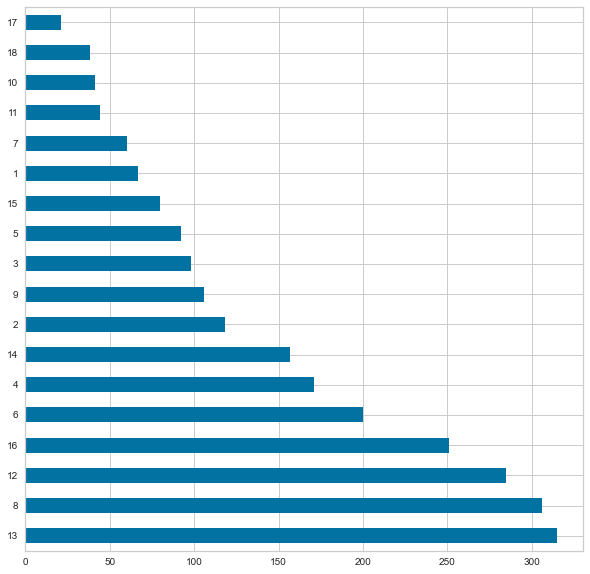

In [107]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(1, 1, figsize = (10, 10))

df['Topic'].value_counts().plot(kind = 'barh') #horizontal frequency plot

In [108]:
from matplotlib import pyplot as plt
agg_topics = df.groupby([df.index.year,'Topic'])['Topic'].count().unstack().fillna(0)


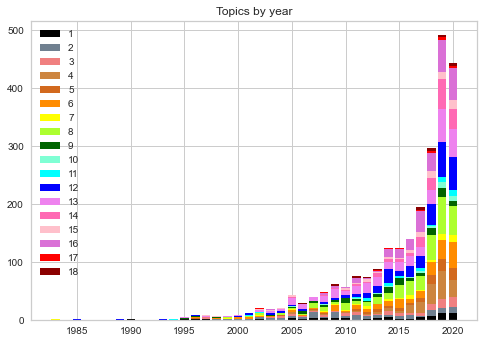

In [112]:
fig, ax = plt.subplots()

colors = ['black', 'slategray', 'lightcoral','peru','chocolate','darkorange',
          'yellow','greenyellow','darkgreen','aquamarine','cyan',
         'blue', 'violet','hotpink','pink','orchid','red','darkred']
bottom = np.zeros(len(agg_topics))

for i, col in enumerate(agg_topics.columns):
  ax.bar(agg_topics.index, agg_topics[col], bottom=bottom, label=col,
         color=colors[i])
  bottom += np.array(agg_topics[col])

ax.set_title('Topics by year')
ax.legend()

In [72]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+ 'Final')

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ 'Final' + '.html')

In [73]:
pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.023695 -0.098615       1        1  15.469905
0      0.005514 -0.031746       2        1  14.350451
6     -0.138754 -0.008306       3        1  13.383897
5      0.113349  0.034456       4        1  11.446409
14     0.101723  0.061345       5        1   7.422758
4     -0.030884  0.079608       6        1   6.129016
10     0.048917  0.006606       7        1   5.421973
2      0.011916  0.021577       8        1   4.409839
3     -0.026905 -0.031679       9        1   4.332637
12     0.065629 -0.053608      10        1   3.923167
11    -0.083556  0.050863      11        1   3.517272
9     -0.040104 -0.028864      12        1   3.381744
13    -0.081198  0.047549      13        1   3.328512
8      0.040238 -0.042292      14        1   1.834106
7      0.037809 -0.006894      15        1   1.648312, topic_info=         Term         Freq        Total Category  logprob  loglift
227     model  2007.000000  2007.000000  Default  30.0000  30.0000
131  customer  1127.000000  1127.000000  Default  29.0000  29.0000
64      datum  1674.000000  1674.000000  Default  28.0000  28.0000
624    market   923.000000   923.000000  Default  27.0000  27.0000
145   network  1435.000000  1435.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
624    market    10.006793   923.559514  Topic15  -5.4028  -0.4196
115   purpose     8.145294   290.563683  Topic15  -5.6086   0.5310
64      datum     9.725772  1674.554588  Topic15  -5.4313  -1.0431
631  analysis     8.996543   886.362302  Topic15  -5.5092  -0.4849
193   service     8.353097   552.812288  Topic15  -5.5835  -0.0870

[857 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
471       1  0.323428  accuracy
471       2  0.168745  accuracy
471       3  0.284054  accuracy
471       4  0.002812  accuracy
471       5  0.005625  accuracy
...     ...       ...       ...
57       11  0.024623     yield
57       12  0.012311     yield
57       13  0.012311     yield
57       14  0.012311     yield
57       15  0.012311     yield

[7995 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 7, 6, 15, 5, 11, 3, 4, 13, 12, 10, 14, 9, 8])

In [75]:
from collections import Counter

Counter(df.coverDate).keys()

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys([Timestamp('2021-06-01 00:00:00'), Timestamp('2021-05-01 00:00:00'), Timestamp('2021-04-15 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-01 00:00:00'), Timestamp('2021-03-15 00:00:00'), Timestamp('2021-03-01 00:00:00'), Timestamp('2021-02-20 00:00:00'), Timestamp('2021-02-08 00:00:00'), Timestamp('2021-02-02 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-01-27 00:00:00'), Timestamp('2021-01-12 00:00:00'), Timestamp('2021-01-09 00:00:00'), Timestamp('2021-01-08 00:00:00'), Timestamp('2021-01-01 00:00:00'), Timestamp('2020-12-30 00:00:00'), Timestamp('2020-12-24 00:00:00'), Timestamp('2020-12-09 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2020-11-04 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-10-25 00:00:00'), Timestamp('2020-10-01 00:00:00'), Timestamp('2020-09-15 00:00:00'), Timestamp('2020-09-12 00:00:00'), Timestamp('2020-09-01 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-08-14 00:00:00'), Tim

In [76]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/lda_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/lda_'+str(num_topics) + '.html')

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Logistic Regression - Still need to add the sentiments

### X: Topic distribution per corpus, year, Sentiment, author publication score, first author's university rank, 

### y: citation number

### Things to do
* k-cv to choose the optimal topic numbers
* bigram
* interaction term

### Results

We see that a normal logistic model performs the best in terms of f1 score

* We can try other diagnostics.

### logistic regression (unigram)

In [125]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import numpy as np

df.coverDate = df.coverDate.astype(str).str[0:4].astype(int)

X = np.column_stack([train_vecs, df.coverDate, df[0]])
y = np.array(df.citedby_count)
y[y<=np.median(y)] = 0
y[y>np.median(y)] = 1

#import warnings
#warnings.filterwarnings('ignore')

kf = KFold(10, shuffle = True, random_state = 42)

lr_score , lrsgd_score, svcsgd_score, cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000, C = 1
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    lr_score.append(lr.score(X_val_scale, y_val))

    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    lrsgd_score.append(sgd.score(X_val_scale, y_val))
    # print(lrsgd_score)
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
                       
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    svcsgd_score.append(sgd_huber.score(X_val_scale, y_val))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

Logistic Regression Val f1: 0.604 +- 0.031
Logisitic Regression SGD Val f1: 0.591 +- 0.047
SVM Huber Val f1: 0.200 +- 0.306


In [126]:
print(sgd.coef_, sgd.intercept_)
print(lr.coef_, lr.intercept_)

[[-0.03610406 -0.09298761  0.06320862  0.01991668 -0.18272745 -0.36860374
  -0.09543345  0.08855292 -0.23382736  0.03229115  0.16338194  0.13267604
   0.2041069  -0.07162318 -0.00262082  0.30766371 -0.36974743  0.03231357
  -1.09857977 -0.21528985]] [0.14671711]
[[-0.03078047 -0.02846568 -0.09992738  0.08730665  0.00184455 -0.15547825
  -0.00289811  0.13488108 -0.0301622  -0.11186496 -0.05416834 -0.05854597
   0.00531378  0.05782192  0.03919418  0.11725048 -0.11137261 -0.01612287
  -0.72261574 -0.01239248]] [0.01524313]


In [127]:
print(f'Logistic Regression Accuracy:{np.mean(lr_score)}')
print(f'Logistic Regression SGD Accuracy:{np.mean(lrsgd_score)}')
print(f'SVM Huber Accuracy:{np.mean(svcsgd_score)}')

Logistic Regression Accuracy:0.643673469387755
Logistic Regression SGD Accuracy:0.5979591836734695
SVM Huber Accuracy:0.5163265306122449


# Word Embeddings

### Loading the pre-trained Google's word2vec model
How to make it work?
- Dowload Google's trained Word2Vec model at: https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
- unzip the .gz file

In [80]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format(r'C:\Users\marco\Desktop\NLP_local\notebook\data\GoogleNews-vectors-negative300.bin', binary=True)

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Creating a sentence embedding for each abstract

In the cell below, we create the embedding for each word of the abstract using Google's word2vec model. Then we average all these vectors to obtain a unique abstract (sentence) embedding. This is repeated for all the abstracts in corpus1. Notice that corpus1 was created [here](#Creating-corpus1-and-corpus2).

In [81]:
# Create an empty list used to store the abstract embedding
list_word2vec_vector = []
# Create an empty list to store the words that our model does not recognise
list_missing_word = []

# Loop all the abstracts in corpus1
for i in range(len(corpus1)):
    # Creating an empty list used to store the word embeddings of each word in the abstract
    word_matrix = []
    print(i)
    # Loop all the words in corpus1[i]
    for word in corpus1[i]:
        # Try/except is used here because if a word is not recognised by the model, an exception is raised
        try:
            # Embedding the word using our model
            word_vector = model[word]
            # Appending the embedding to the list of embeddings
            word_matrix.append(word_vector)
        except Exception as e:
            # If the word is not recognised, it is stored in the list below
            list_missing_word.append(word)
    # Take the average over all the word embeddings of an abstract
    sentence_embedding = np.average(np.asarray(word_matrix), axis = 0)
    # Append the average vector to the list below
    list_word2vec_vector.append(sentence_embedding)

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [82]:
# Checking the words that are not recognised by the model
print(set(list_missing_word))
print(np.shape(word_vector)) # Check size of a word vector (must be 300)
print(np.shape(word_matrix)) # Check size word matrix (must be equal to num of words in abstract minus the words that are not recognised)
print(len(list_word2vec_vector[0])) # Check size of abstract vector (must be 300)

{'madupy', 'bridgerland', 'interfirm', 'icde', 'advame', 'neuroimage', 'identimod', 'approximator', 'bhmm', 'stationarity', 'admet', 'fasilitator', 'stratex', 'sdgcs', 'dpsn', 'shortcome', 'spq', 'rtb', 'ysneaker', 'schulten', 'brno', 's_kohonen', 'mackey', 'etransition', 'hughe', 'fresc', 'otcs', 'exergy', 'thresholde', 'recommenda', 'cdo', 'crrs', 'multisymbol', 'duroc', 'hta', 'mgedt', 'csde', 'costĝ', 'alberto', 'bso', 'mxnet', 'unobserve', 'aoi', 'icici', 'arctangent', 'mdp', 'ahme', 'scms', 'mlp', 'saarland', 'internatioonal', 'rbfn', 'utilise', 'lubext', 'smartpls', 'dissimilaritie', 'efa', 'aoc', 'discretize', 'ariba', 'sofm', 'rnns', 'ojf', 'pselm', 'summarise', 'servitization', 'pende', 'simplifie', 'bcpnn', 'personalitie', 'regularizaron', 'gfnn', 'aaai', 'gendere', 'amazonaw', 'multifractality', 'gsor', 'issn', 'innogps', 'ngarch', 'nonlinearitie', 'tuban', 'vama', 'thaiecontwitter', 'fce', 'metacost', 'idmap', 'uloric', 'lda', 'hopkin', 'qstr', 'odss', 'nasnet', 'mcnemar',

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Penalized Logistic model to predict number of citations with abstract embeddings

Run a (penalized) logistic regression to see if the asbtract embeddings using Google's word2vec model have any predictive power of the number of citations.
The y variable used is the same defined [here](#logistic-regression-(unigram)). The x variables are the 300 values of the asbtract embeddings. 

In [83]:
# Check that y vector has the same order of df
print(y[:10])
print(df.citedby_count[:10])
# check that corpus1 has the same order of df
print(df.description[:2])
print(corpus1[:2])

[0 0 0 0 0 0 0 1 0 0]
coverDate
2021-06-01     0
2021-06-01     2
2021-06-01     0
2021-06-01     0
2021-06-01     1
2021-06-01     0
2021-06-01     0
2021-05-01    12
2021-05-01     1
2021-05-01     0
Name: citedby_count, dtype: int64
coverDate
2021-06-01    one of the applications of robotic farmer-assi...
2021-06-01    the prime concern of this study is to explore ...
Name: description, dtype: object
[['application', 'robotic', 'farmer', 'assistant', 'platform', 'equip', 'machine', 'vision', 'evaluation', 'production', 'yield', 'harvest', 'damaging', 'product', 'situation', 'farmer', 'receive', 'proper', 'information', 'harvesting', 'post', 'harvesting', 'management', 'decide', 'require', 'human', 'resource', 'harvesting', 'equipment', 'storage', 'space', 'transportation', 'product', 'study', 'machine', 'vision', 'track', 'vehicle', 'design', 'develop', 'yield', 'estimation', 'kiwifruit', 'travel', 'kiwifruit', 'trelli', 'feature', 'intensity', 'histogram', 'histogram', 'orient', 'g

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
# Setting X as the predictior of the model (i.e. the abstract sentence embedding)
X = np.column_stack([list_word2vec_vector])

# Set K-Folds cross-validator
kf = KFold(10, shuffle = True, random_state = 42)

# Empty lists to store the mean accuracy (lr_score) and balanced F-score (cv_lr_f1)
lr_score , cv_lr_f1= [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    # Notice that I am NOT normalizing the data <<---
    
    # Set logistic regression model
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000, 
        C = 0.8 # Penalization parameter (potentially to be tuned)
    ).fit(X_train, y_train)
    
    # Computing mean accuracy and balanced F-score
    y_pred = lr.predict(X_val)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    lr_score.append(lr.score(X_val, y_val))

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:443: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int

C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

In [85]:
print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logistic Regression Accuracy:{np.mean(lr_score)}')
print(sum(sum(lr.coef_>0.1))) # Check number of coefficient bigger than 0.1

Logistic Regression Val f1: 0.582 +- 0.041
Logistic Regression Accuracy:0.5882305194805195
117


C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
